# Student grades prediction

By      Rushda Shabbir

batch - DS2405

# Project Description

# The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description-  total 43 columns

Seat No : The enrolled number of candidate that took the exams
    
CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided            to student.
 
All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX     are numbers where first X represents the year the canditate took exam
    
Predict - CGPA of a student based on different grades in four years.

Dataset Link-
• https://raw.githubusercontent.com/dsrscientist/dataset4/refs/heads/main/Grades.csv


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from tqdm import tqdm

**Load the Dataset**

In [2]:
df = pd.read_csv('Project Dataset/Grades.csv')

In [3]:
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [4]:
df.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [5]:
df.tail()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[5 rows x 43 columns]

#### Explanatory Analysis

In [6]:
# Checking the dimension of the dataset
df.shape

(571, 43)

In [7]:
df.size

24553

In [8]:
# Checking the columns names
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [9]:
# checking the types of the columns
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [10]:
#Groups columns by data type

df.columns.to_series().groupby(df.dtypes).groups

{float64: ['CGPA'], object: ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']}

In [11]:
# checking the null values

df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [12]:
df.isnull().sum().sum()

425

In [13]:
#pip install missingno

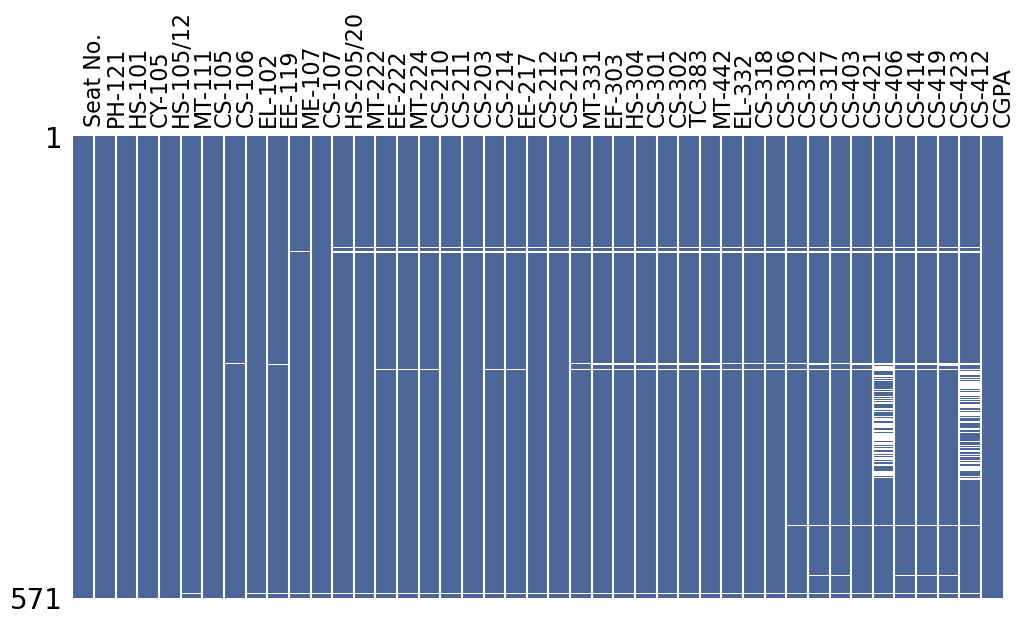

In [14]:
import missingno as msno
import matplotlib.pyplot as plt  

# Your code
msno.matrix(df, figsize=(12, 6), color=(0.3, 0.4, 0.6), sparkline=False)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()

**Managing absent data**

In [15]:
#treated all nan values
df.fillna(0, inplace=True)

In [16]:
# Identify Duplicated Rows in the Dataset

df.duplicated().sum()

0

In [17]:
# checking the null values

df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

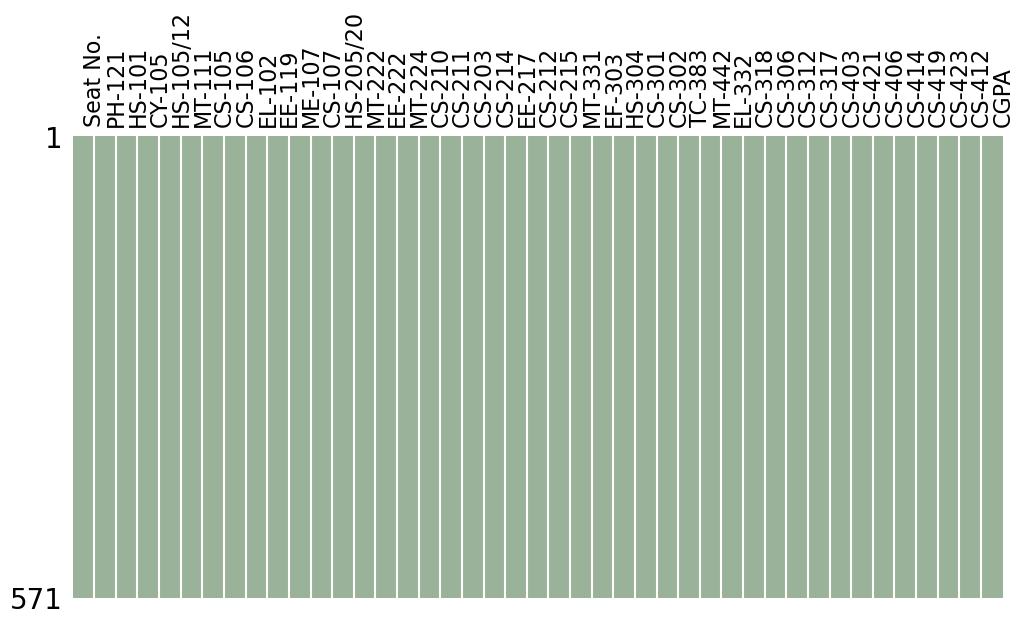

In [18]:
#Create a matrix plot to visualize missing data

msno.matrix(df, figsize=(12, 6), color=(0.6, 0.7, 0.6), sparkline=False)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()

In [19]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     571 non-null    object 
 4   HS-105/12  571 non-null    object 
 5   MT-111     571 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     571 non-null    object 
 8   EL-102     571 non-null    object 
 9   EE-119     571 non-null    object 
 10  ME-107     571 non-null    object 
 11  CS-107     571 non-null    object 
 12  HS-205/20  571 non-null    object 
 13  MT-222     571 non-null    object 
 14  EE-222     571 non-null    object 
 15  MT-224     571 non-null    object 
 16  CS-210     571 non-null    object 
 17  CS-211     571 non-null    object 
 18  CS-203     571 non-null    object 
 19  CS-214     571 non-null    object 
 20  EE-217    

<Axes: >

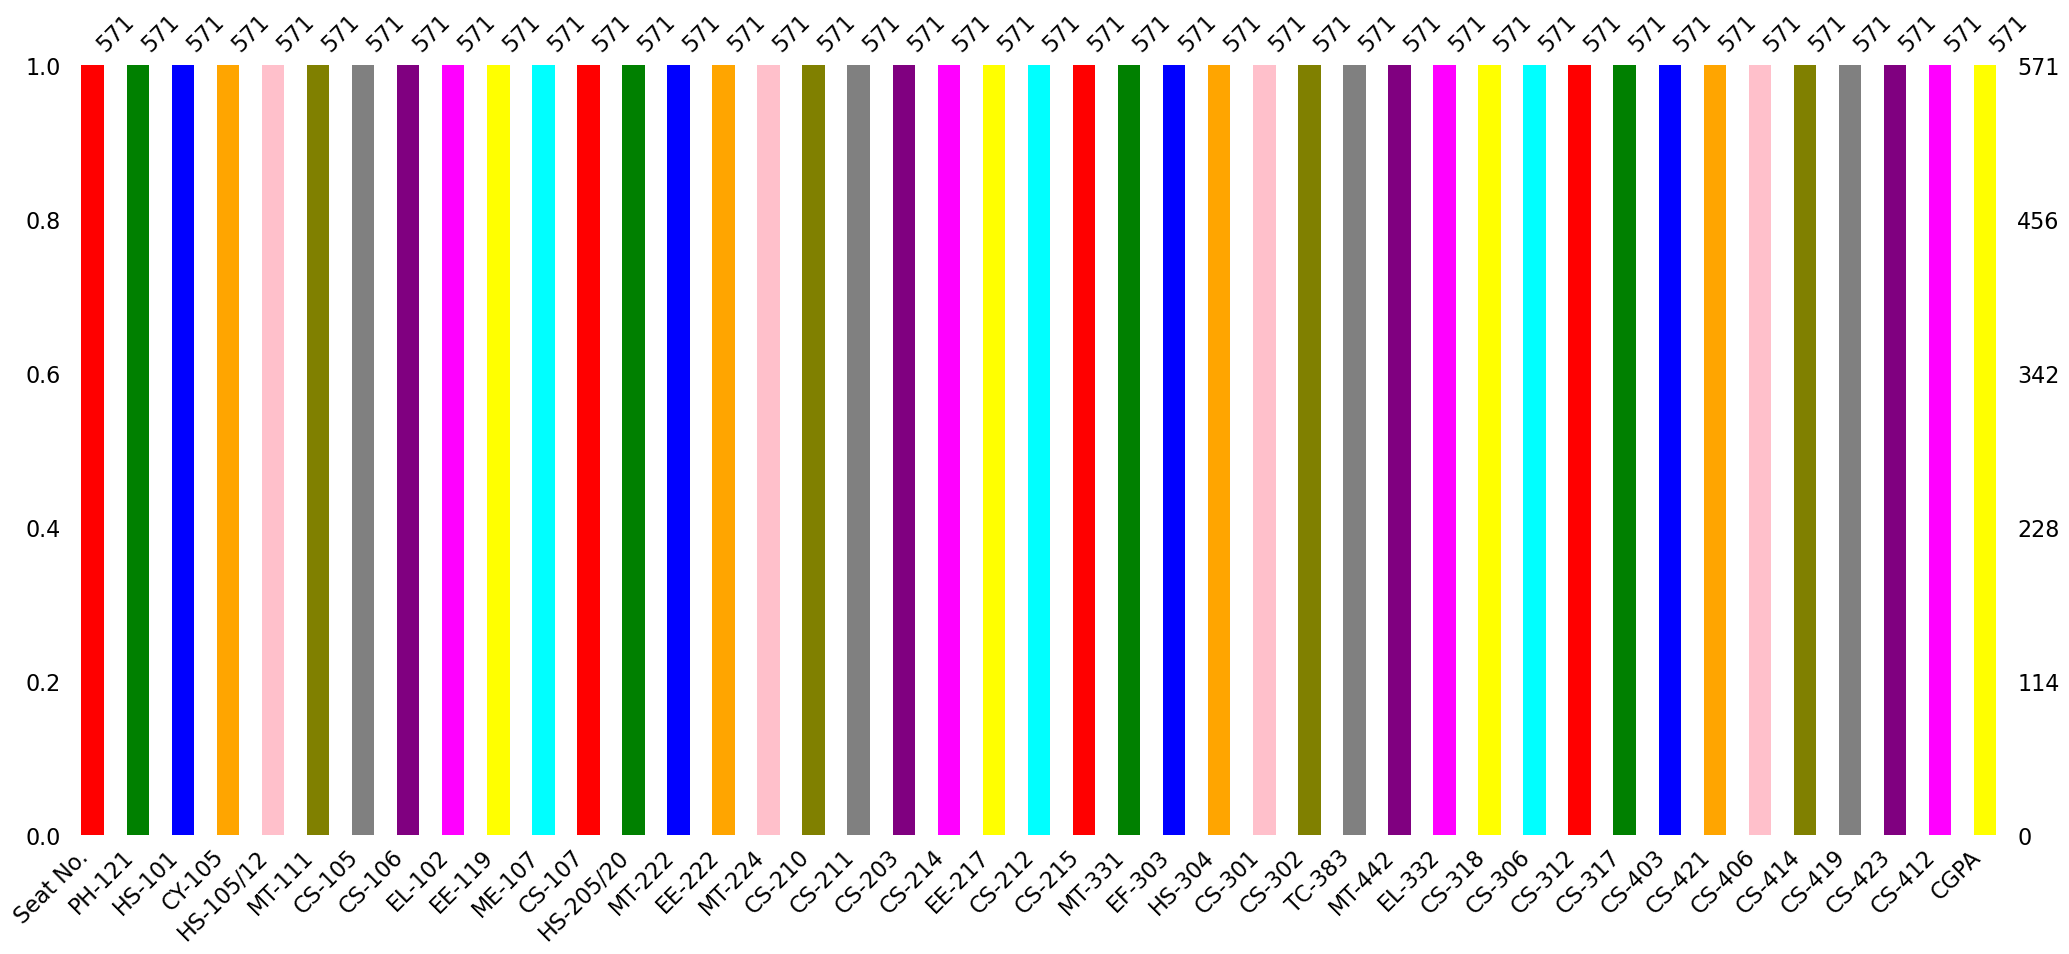

In [21]:
msno.bar(df, color=['red', 'green', 'blue', 'orange', 'pink', 'olive', 'grey', 'purple','magenta', 'yellow', 'cyan'])

# **With the information compiled and visualization, we can see the below mentioned points:**
   * The DataFrame consists of 571 rows and 43 columns.
   * No missing values in columns (43 non-null each), indicating data completeness.
 

In [22]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [23]:
col_grades = df.columns[1:-1]

for column_name in col_grades:
    unique_values = df[column_name].unique()
    print(f"Column: {column_name}")
    print(f"Unique Values: {unique_values}")
    print()

Column: PH-121
Unique Values: ['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']

Column: HS-101
Unique Values: ['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']

Column: CY-105
Unique Values: ['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 0 'WU' 'A+' 'F']

Column: HS-105/12
Unique Values: ['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' 0 'WU' 'A+' 'F']

Column: MT-111
Unique Values: ['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' 0 'A+' 'F' 'WU']

Column: CS-105
Unique Values: ['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D']

Column: CS-106
Unique Values: ['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' 0 'A+' 'F' 'WU']

Column: EL-102
Unique Values: ['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' 0 'A+' 'WU' 'F']

Column: EE-119
Unique Values: ['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'WU' 0 'A+']

Column: ME-107
Unique Values: ['C-' 'D' 'A-' 'C+' 'B+' 'A' 'D+' 'C' 'B' 'B-' 'WU' 0 'F' 'A+']

Column: CS-107
Unique Values: ['C-' 'B+' 'B-' 'D' 'C' 'A-' 'C+' 'D+' 'B

In [24]:
unique_values

array(['A-', 'B', 'A', 'C+', 'B+', 'C-', 'B-', 0, 'A+', 'C', 'D+', 'F',
       'W', 'D'], dtype=object)

**Univariant analysis as per the grading data**

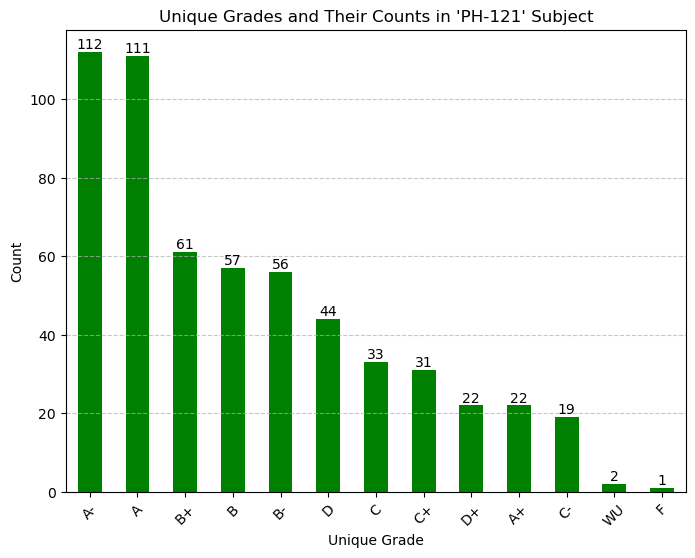

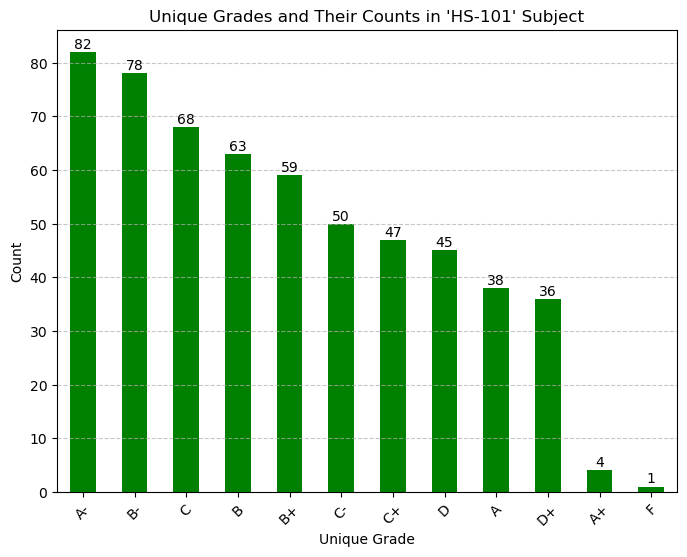

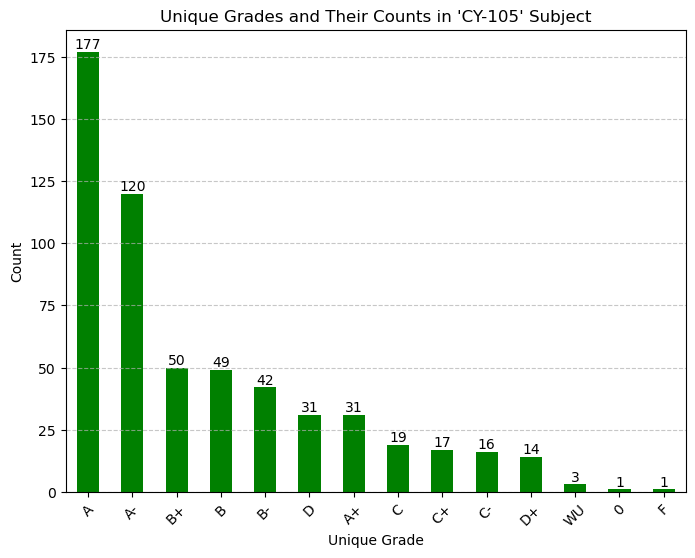

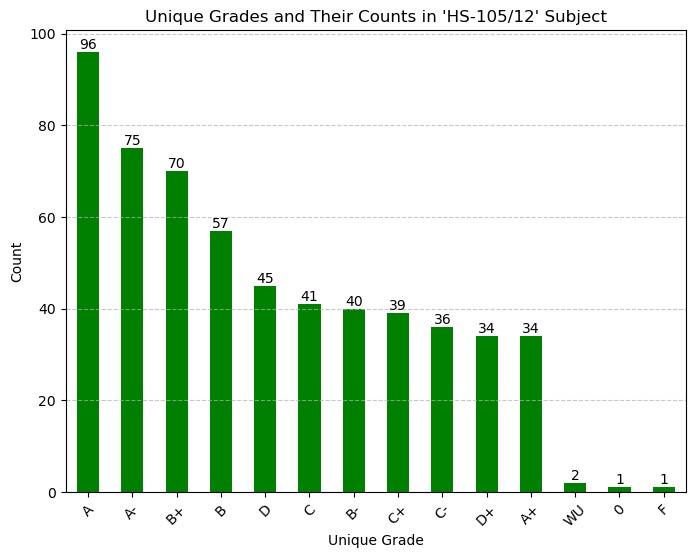

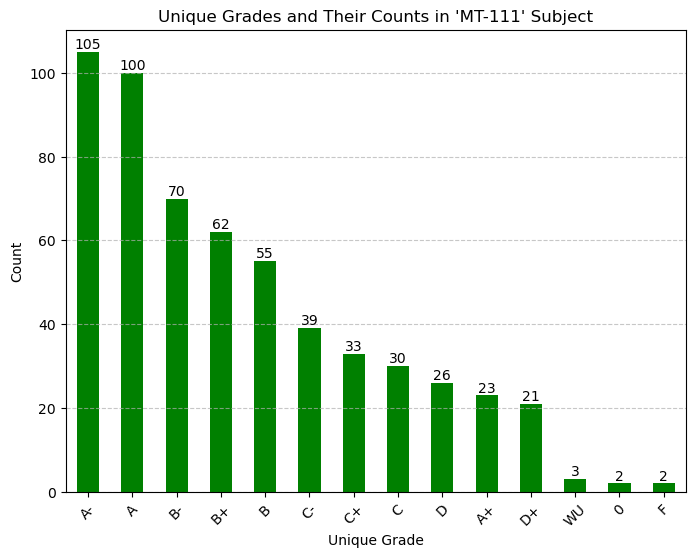

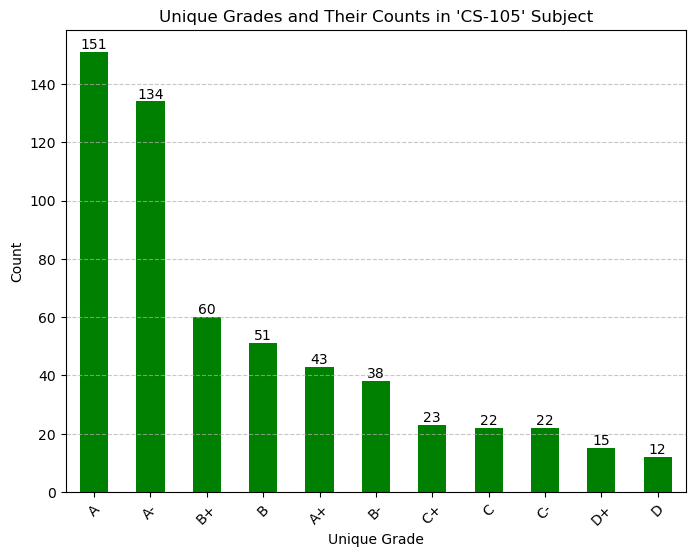

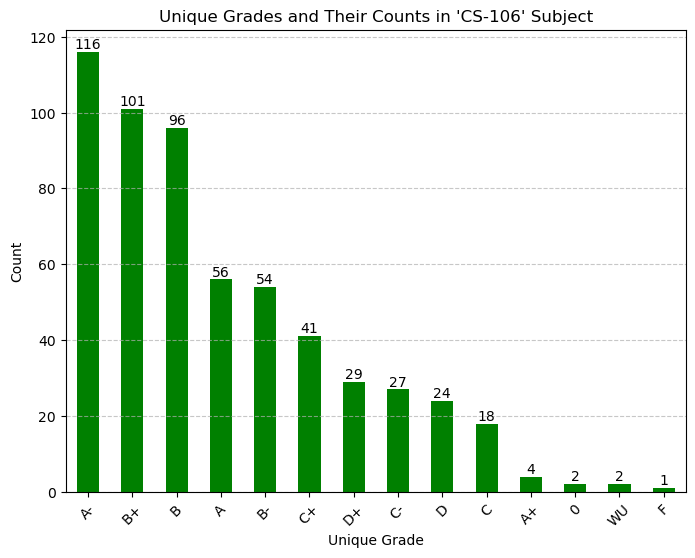

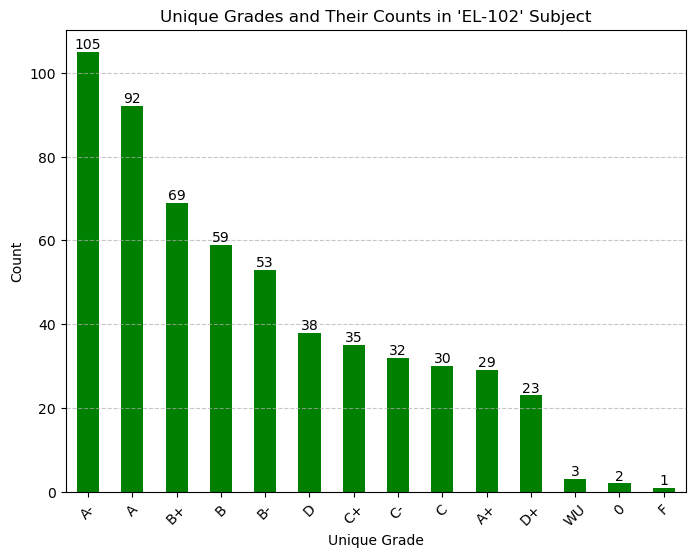

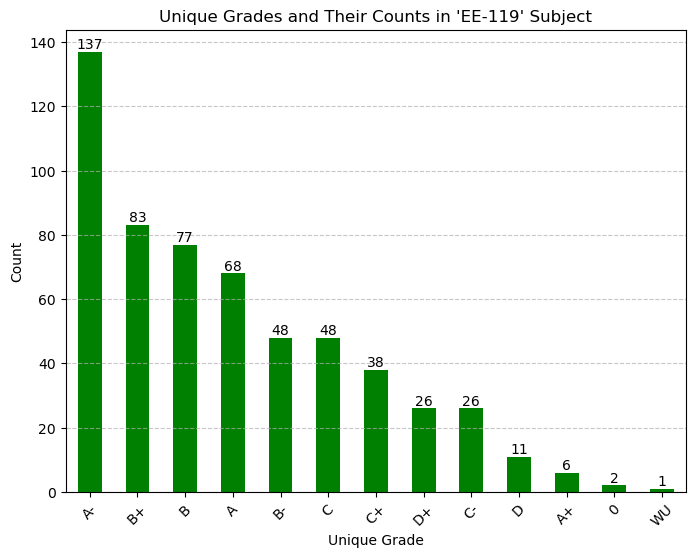

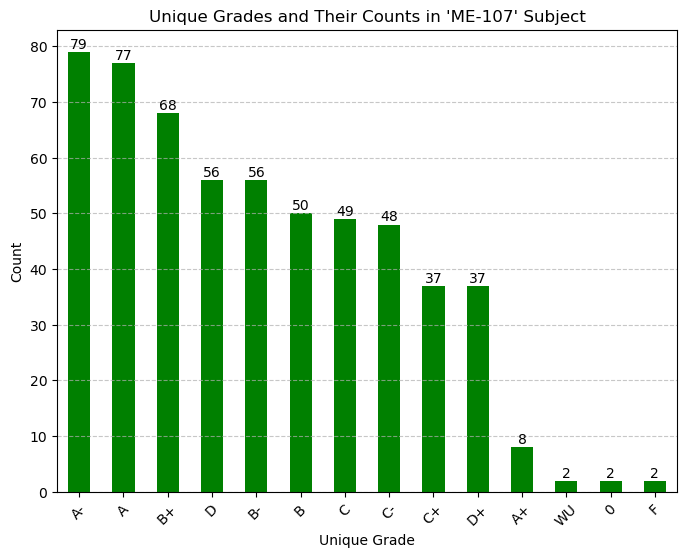

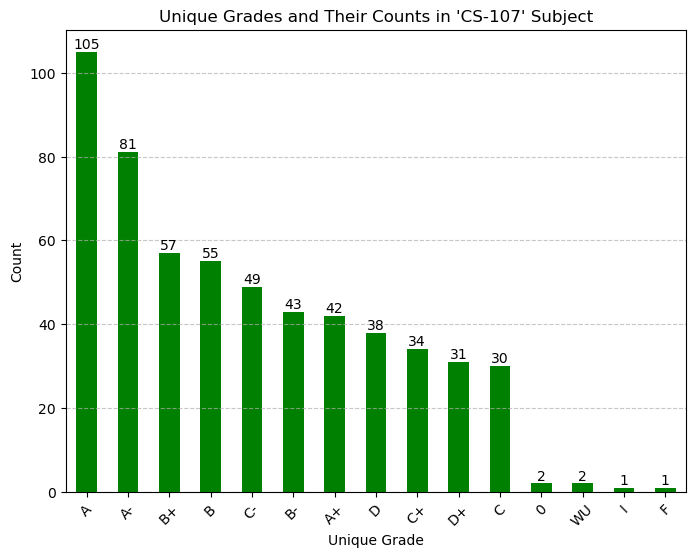

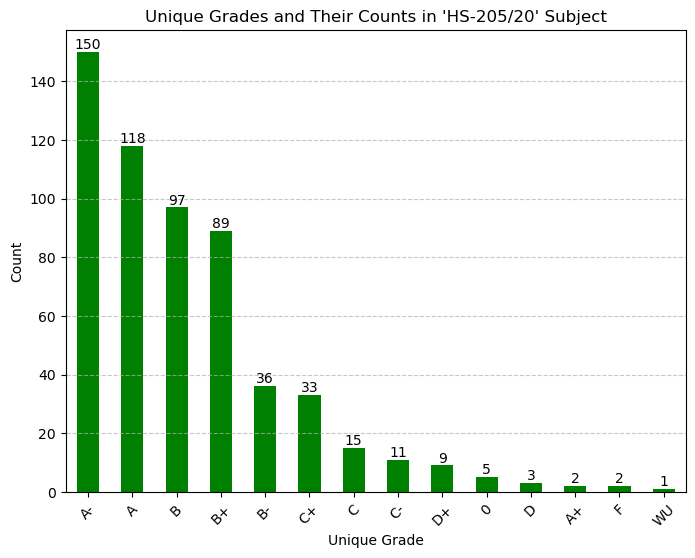

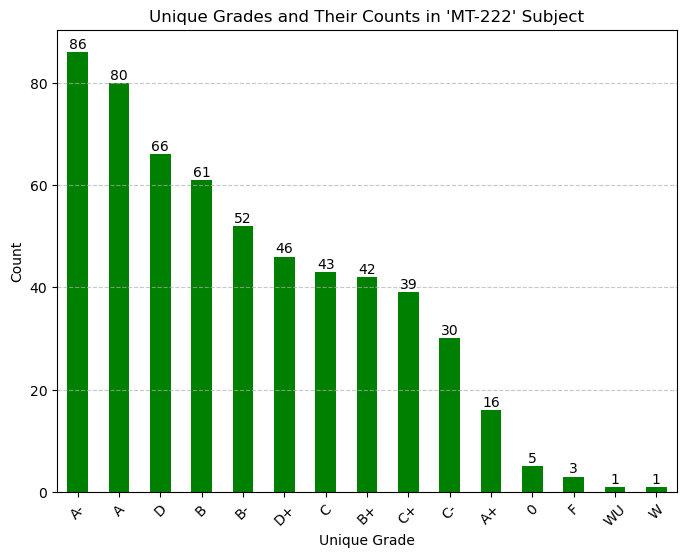

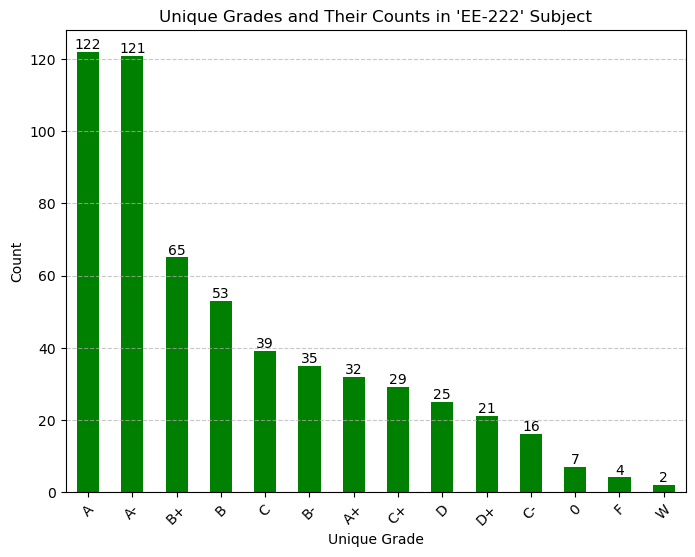

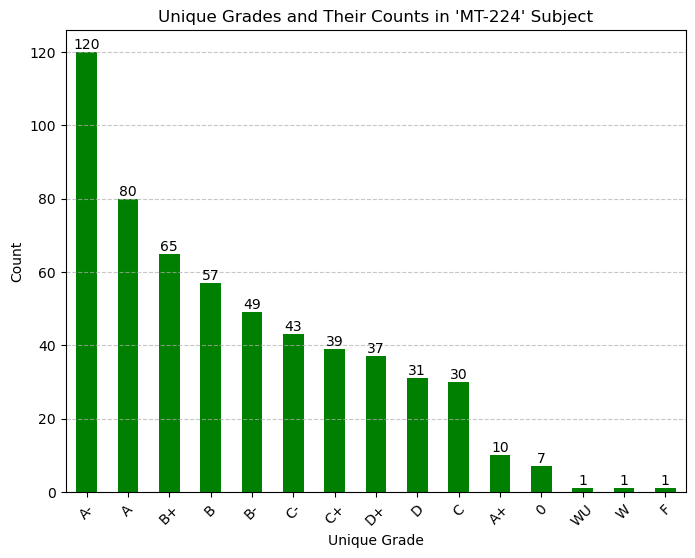

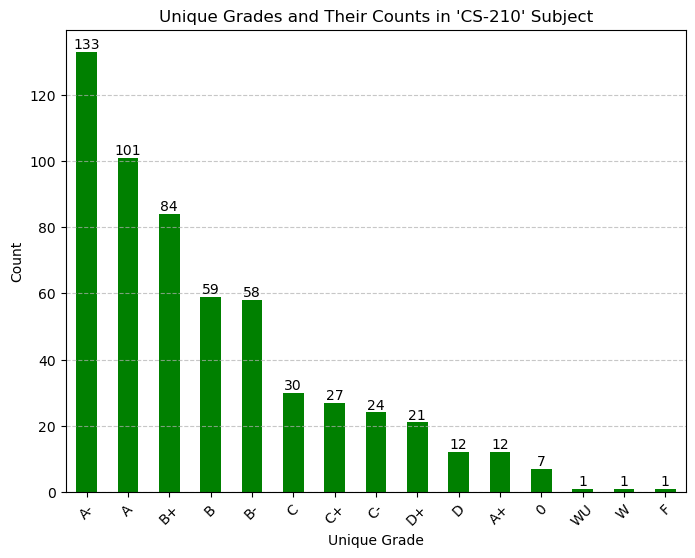

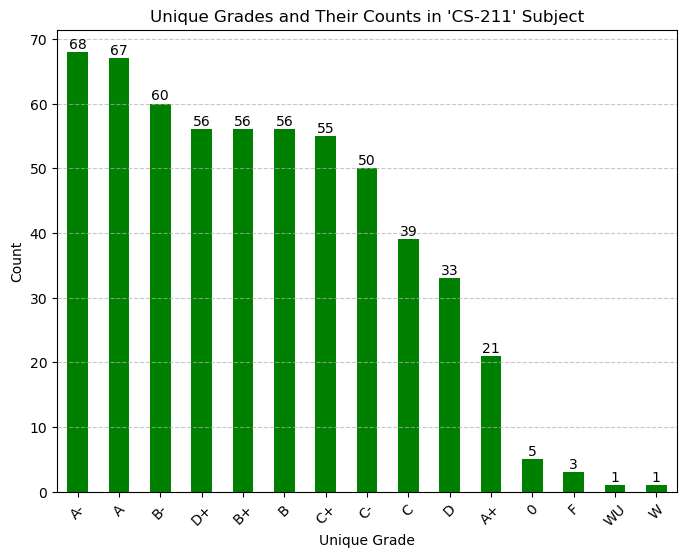

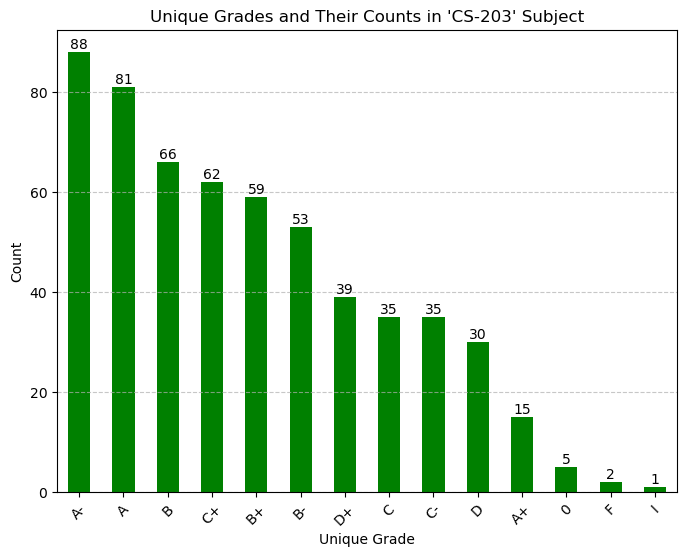

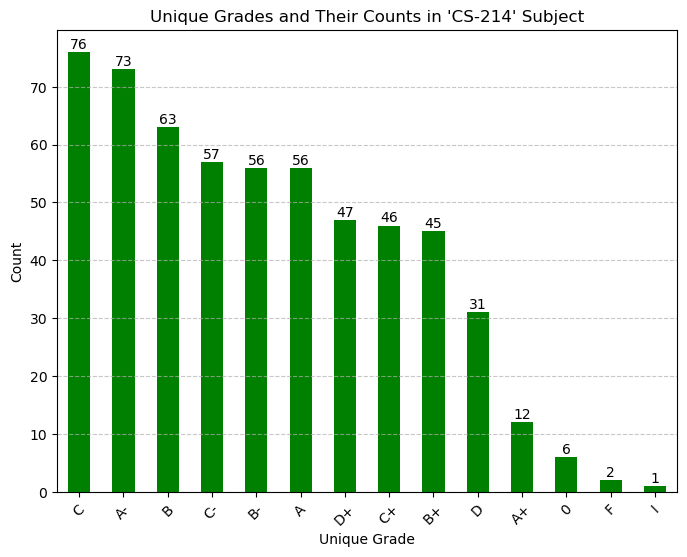

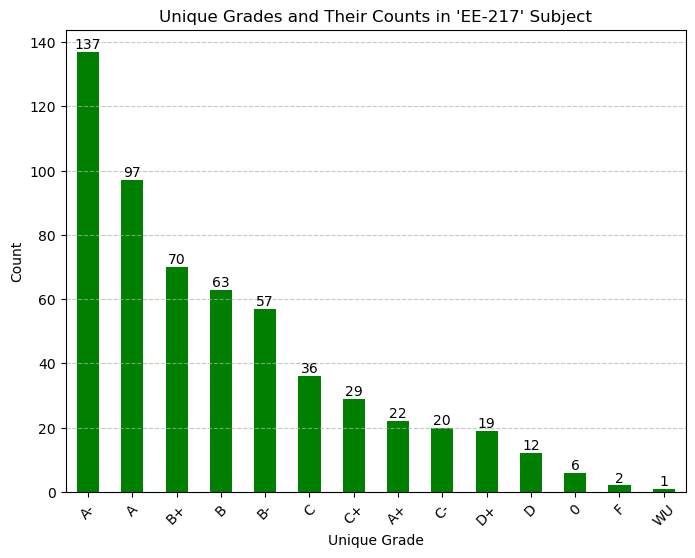

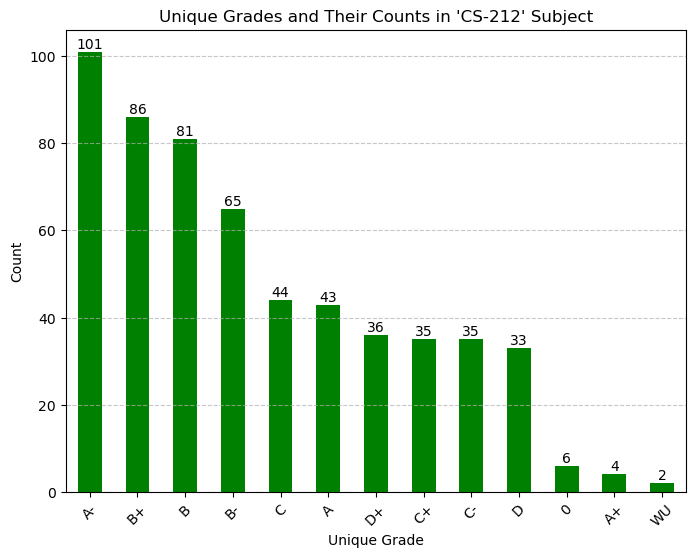

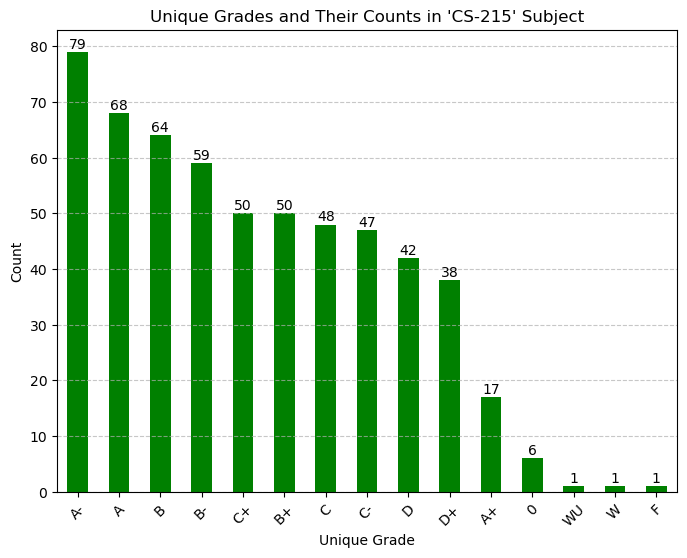

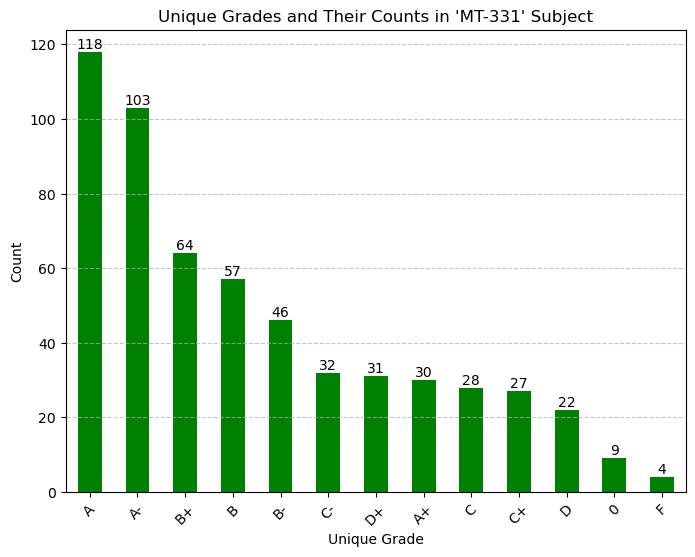

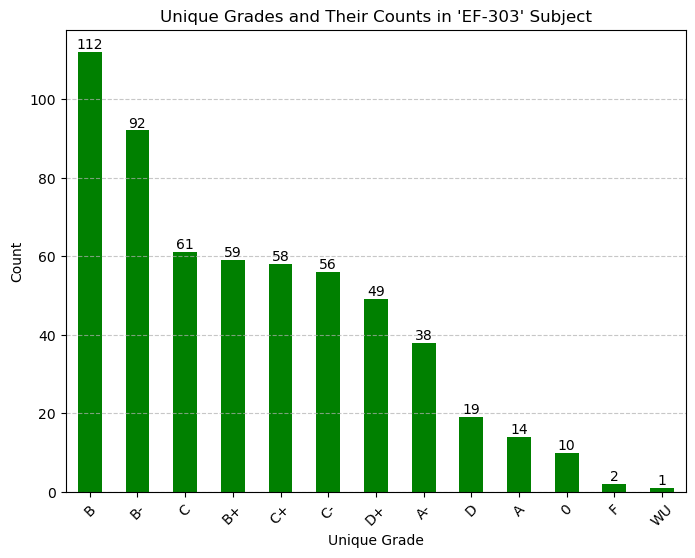

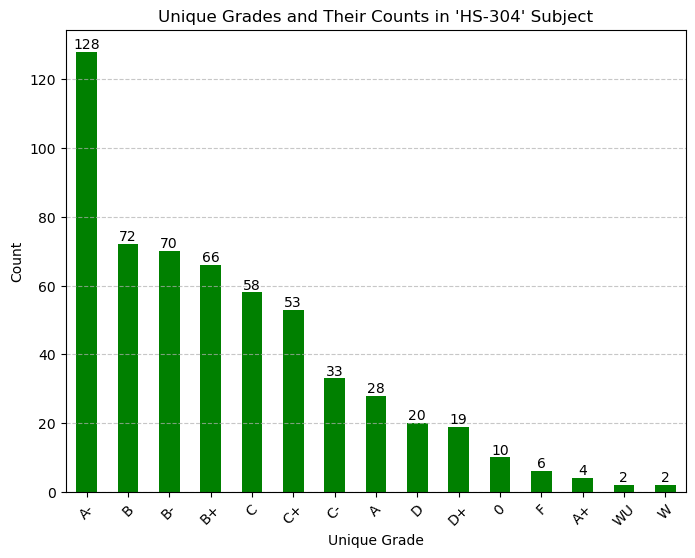

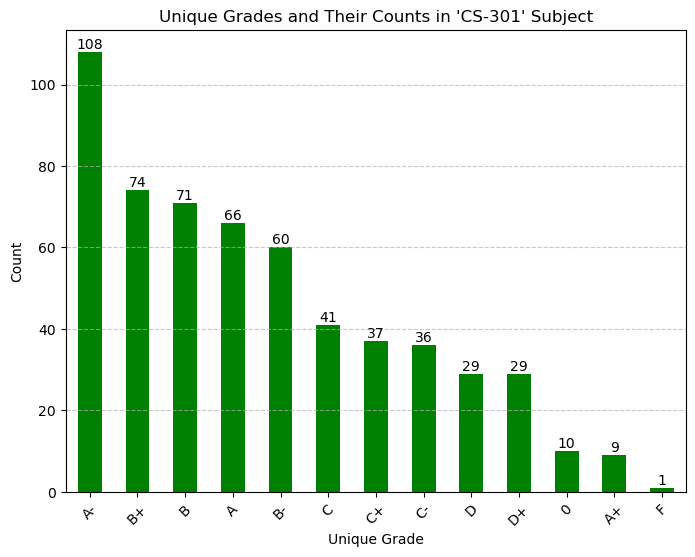

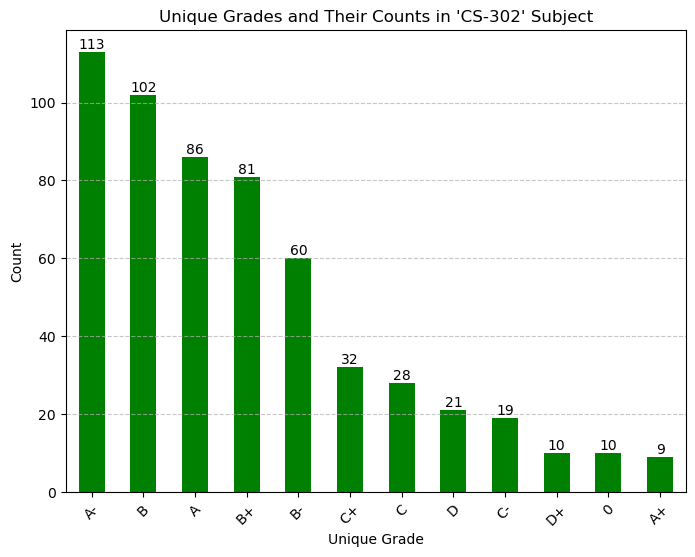

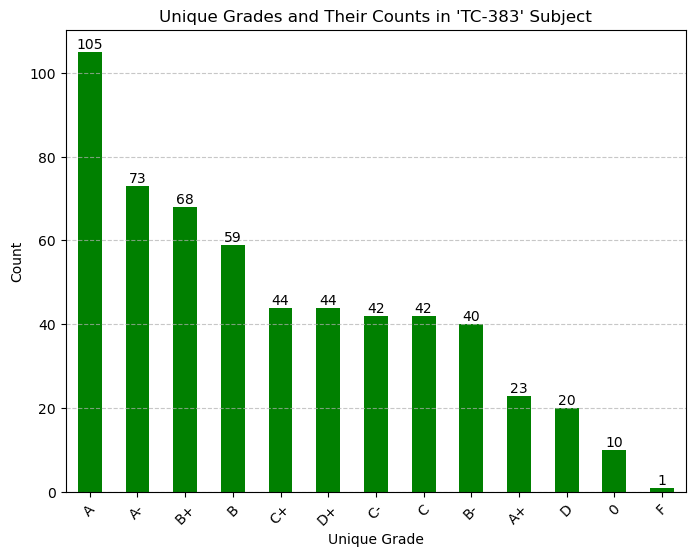

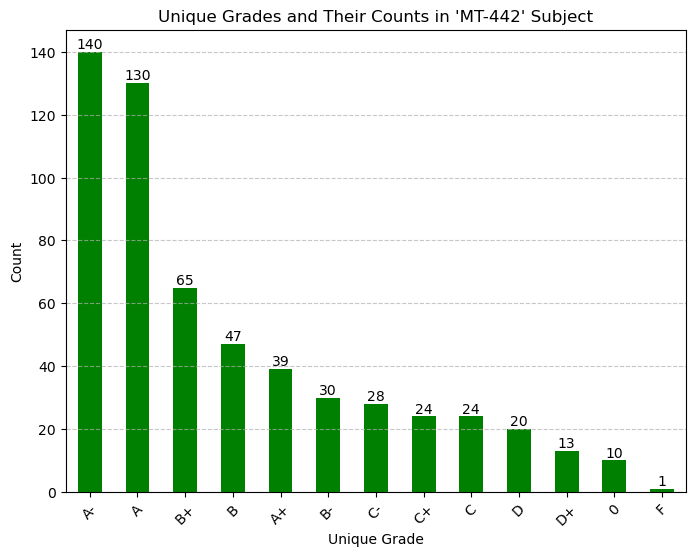

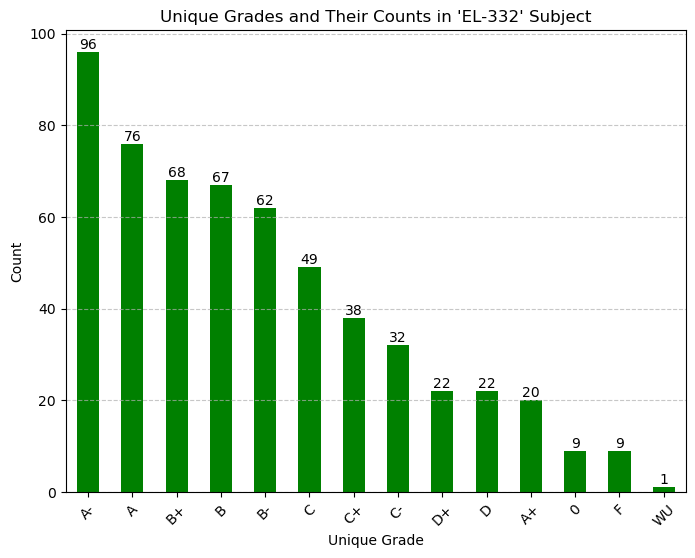

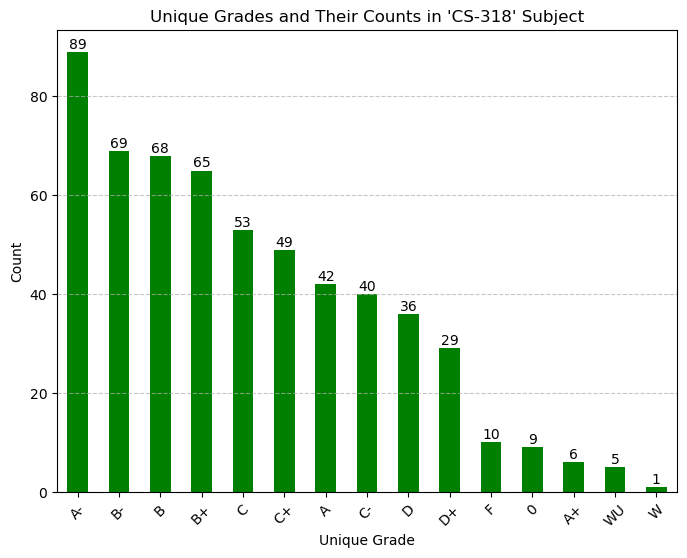

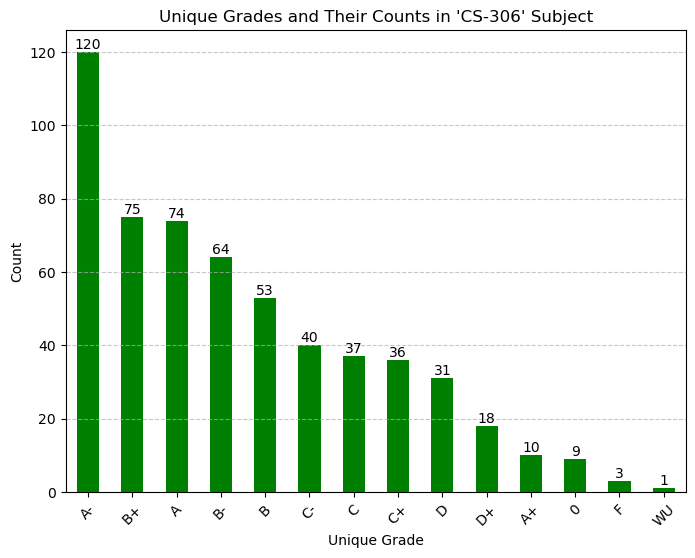

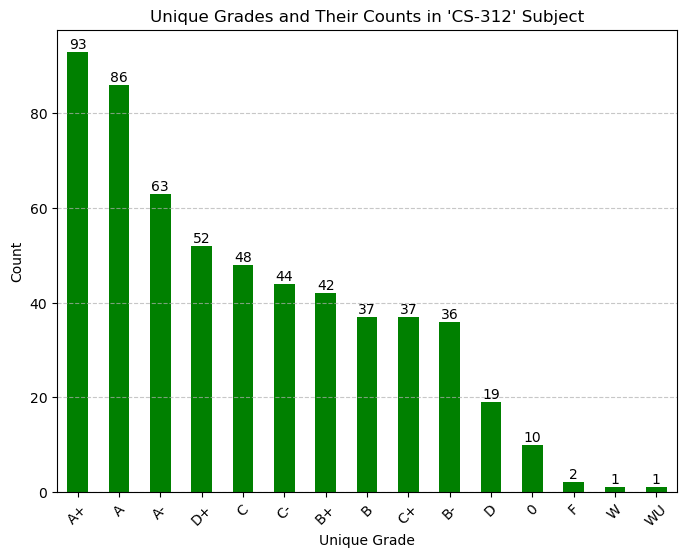

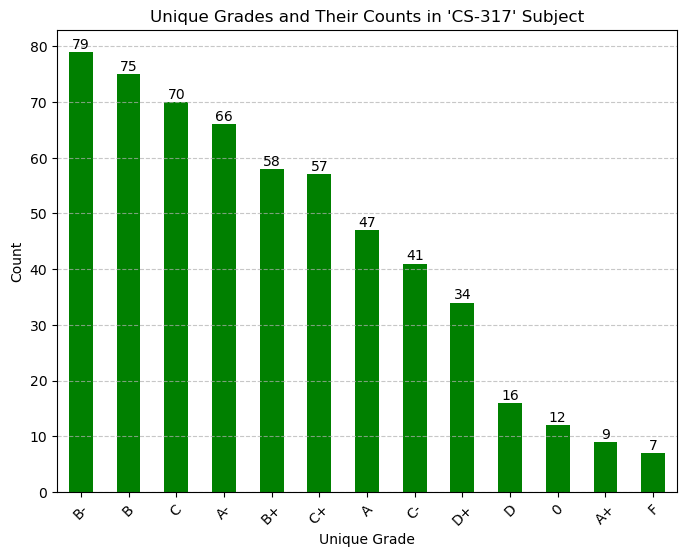

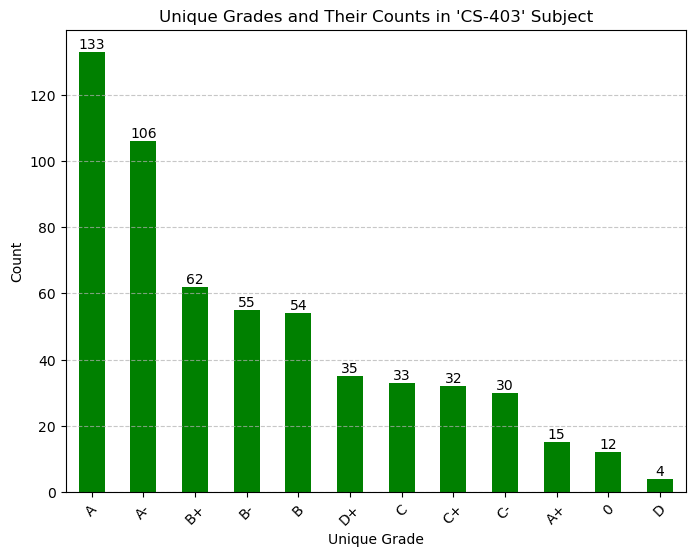

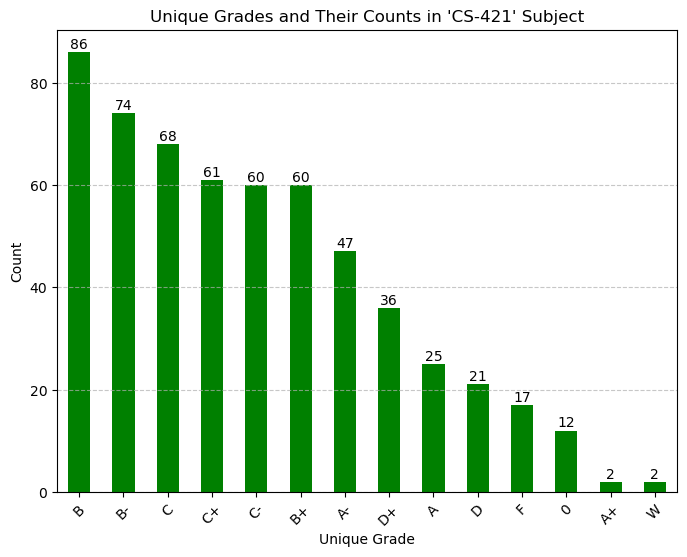

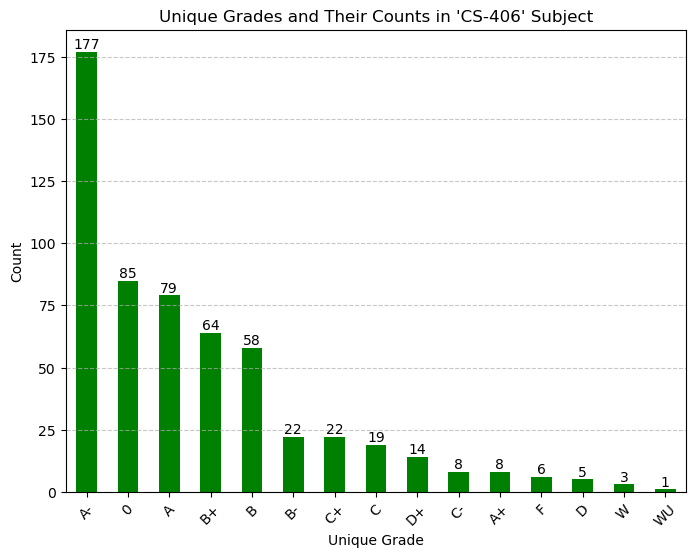

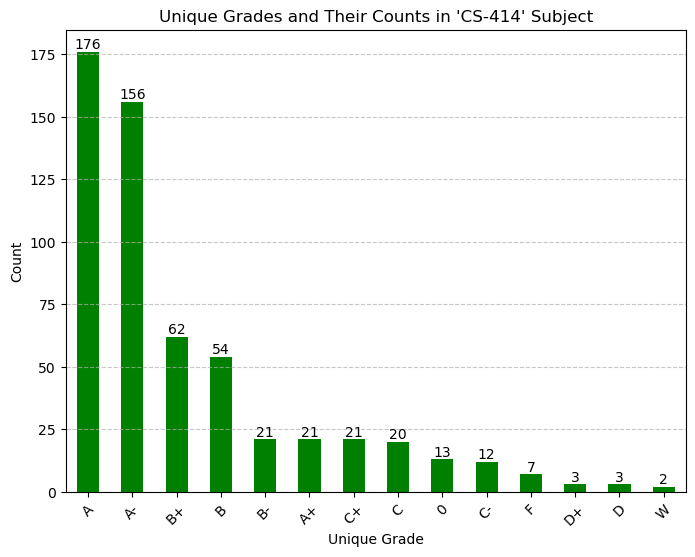

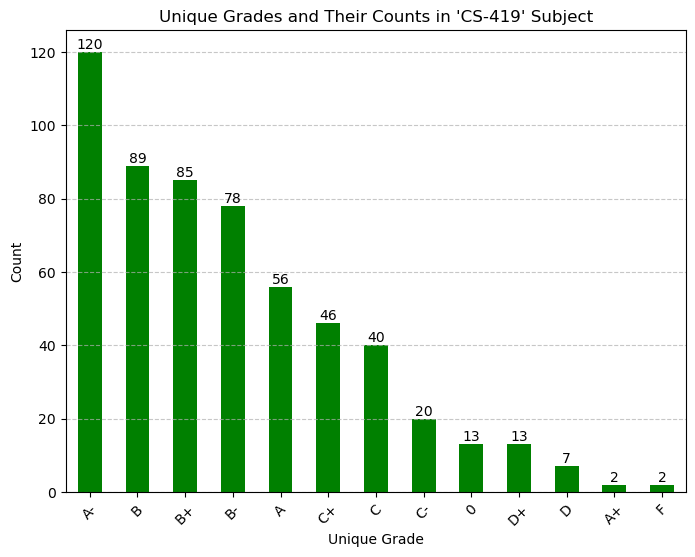

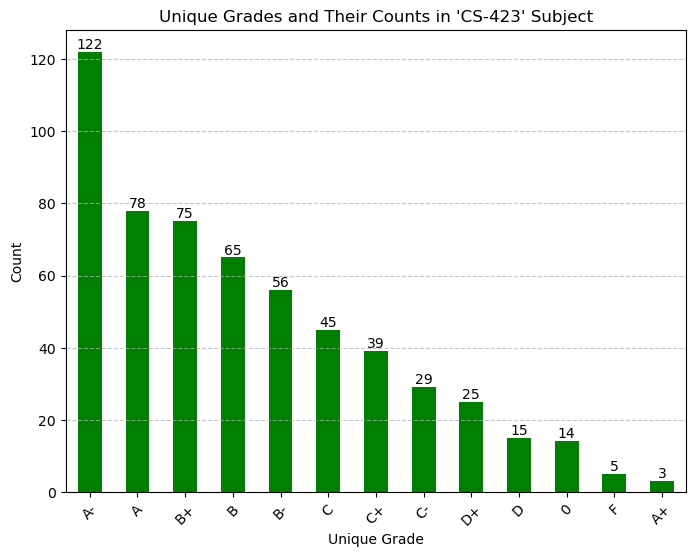

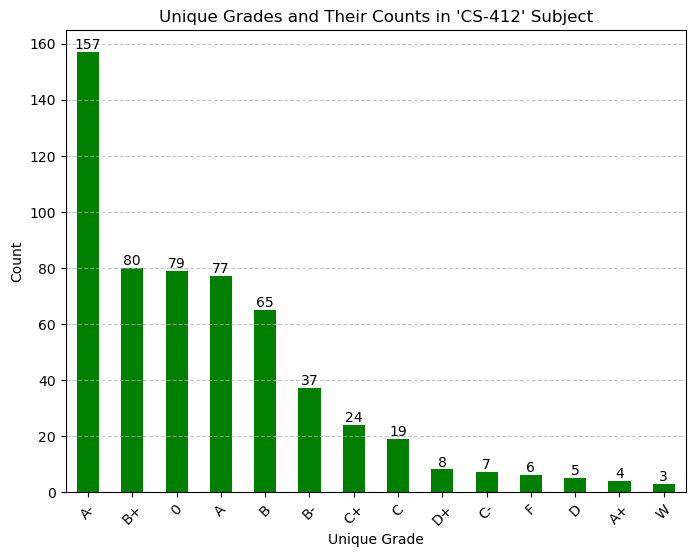

In [25]:
for column_name in df.iloc[:, 1:-1]:  
    unique_counts = df[column_name].value_counts()

    plt.figure(figsize=(8, 6))  
    ax = unique_counts.plot(kind='bar', color='green')  
     # Fixing the typo
    plt.title(f"Unique Grades and Their Counts in '{column_name}' Subject") 
    plt.xlabel("Unique Grade")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)  
    plt.xticks(rotation=45)  

    # Annotate each bar with its count
    for i, count in enumerate(unique_counts):
        ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

    plt.show()

In [26]:
df = df.drop('Seat No.', axis=1)

In [27]:
df.head()

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0     B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1      A      D     D+         D     B-      C      D      A     D+      D   
2      A      B      A        B-     B+      A     B-     B+     A-     A-   
3      D     C+     D+         D      D     A-     D+     C-      D     C+   
4     A-     A-     A-        B+      A      A     A-     B+      A     A-   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 42 columns]

#### Encoding

In [28]:
grade = { 'A+': 12, 'A': 11, 'A-': 10,'B+': 9, 'B': 8, 'B-': 7,'C+': 6, 'C': 5, 'C-': 4,'D+': 3, 'D': 2, 'F': 1,
                                                                                     'WU': 0, 'W': 0, 'I': 0, 0: 0}
df_encoded = df.applymap(lambda x: grade.get(x, x))

df_encoded.head()

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  EE-119  \
0       7       3       4          5       4       3       2       4       7   
1      11       2       3          2       7       5       2      11       3   
2      11       8      11          7       9      11       7       9      10   
3       2       6       3          2       2      10       3       4       2   
4      10      10      10          9      11      11      10       9      11   

   ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  CS-419  \
0       4  ...       4       4       4       4      10      11       4   
1       2  ...       3       2       5       2      10       7       5   
2      10  ...       8       8      11       5      11      11      11   
3       6  ...       3       5       3       4       7       8       6   
4      10  ...       7       9       9       7      10      11      10   

   CS-423  CS-412   CGPA  
0       8      10  2.205  
1       5       8  2.008  
2      10      11  3.608  
3       6       6  1.906  
4      10      11  3.448  

[5 rows x 42 columns]

In [29]:
for column_name in df_encoded.iloc[:, 0:-1]:
    unique_values = df_encoded[column_name].unique()
    print(f"Unique Values in '{column_name}' after Encoding: {unique_values}", '\n')

Unique Values in 'PH-121' after Encoding: [ 7 11  2 10  9  8  6  5  4  3  0 12  1] 

Unique Values in 'HS-101' after Encoding: [ 3  2  8  6 10  7  4  9  5 11 12  1] 

Unique Values in 'CY-105' after Encoding: [ 4  3 11 10  8  6  9  7  5  2  0 12  1] 

Unique Values in 'HS-105/12' after Encoding: [ 5  2  7  9  3  8  4  6 10 11  0 12  1] 

Unique Values in 'MT-111' after Encoding: [ 4  7  9  2 11  6 10  5  8  3  0 12  1] 

Unique Values in 'CS-105' after Encoding: [ 3  5 11 10  8  7  9  6  4 12  2] 

Unique Values in 'CS-106' after Encoding: [ 2  7  3 10  6 11  4  5  8  9  0 12  1] 

Unique Values in 'EL-102' after Encoding: [ 4 11  9  8 10  7  5  6  3  2  0 12  1] 

Unique Values in 'EE-119' after Encoding: [ 7  3 10  2 11  9  8  4  6  5  0 12] 

Unique Values in 'ME-107' after Encoding: [ 4  2 10  6  9 11  3  5  8  7  0  1 12] 

Unique Values in 'CS-107' after Encoding: [ 4  9  7  2  5 10  6  3  8 11  0 12  1] 

Unique Values in 'HS-205/20' after Encoding: [ 9  6 10  8 11  7  0  2 12  

In [30]:
df_encoded.head()

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  EE-119  \
0       7       3       4          5       4       3       2       4       7   
1      11       2       3          2       7       5       2      11       3   
2      11       8      11          7       9      11       7       9      10   
3       2       6       3          2       2      10       3       4       2   
4      10      10      10          9      11      11      10       9      11   

   ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  CS-419  \
0       4  ...       4       4       4       4      10      11       4   
1       2  ...       3       2       5       2      10       7       5   
2      10  ...       8       8      11       5      11      11      11   
3       6  ...       3       5       3       4       7       8       6   
4      10  ...       7       9       9       7      10      11      10   

   CS-423  CS-412   CGPA  
0       8      10  2.205  
1       5       8  2.008  
2      10      11  3.608  
3       6       6  1.906  
4      10      11  3.448  

[5 rows x 42 columns]

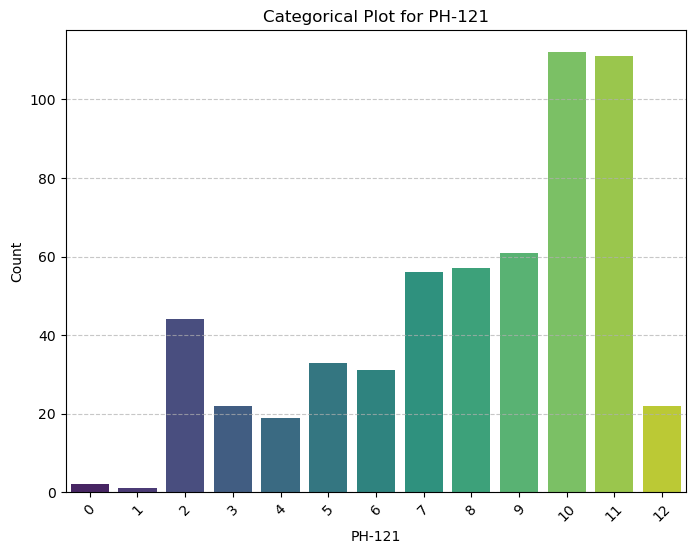

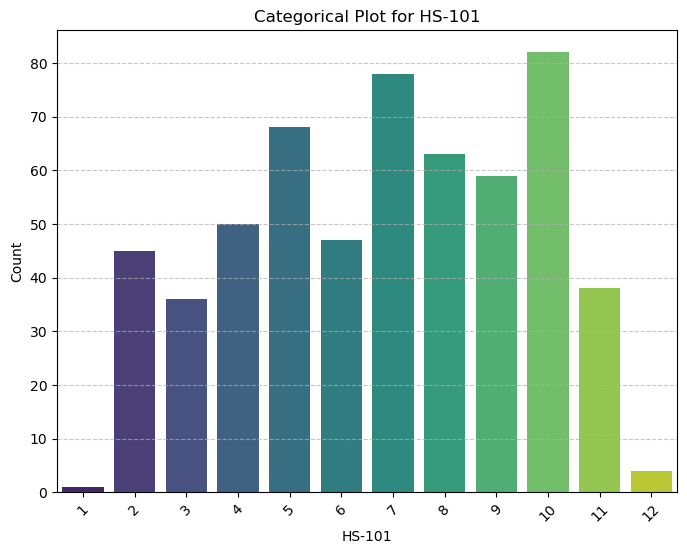

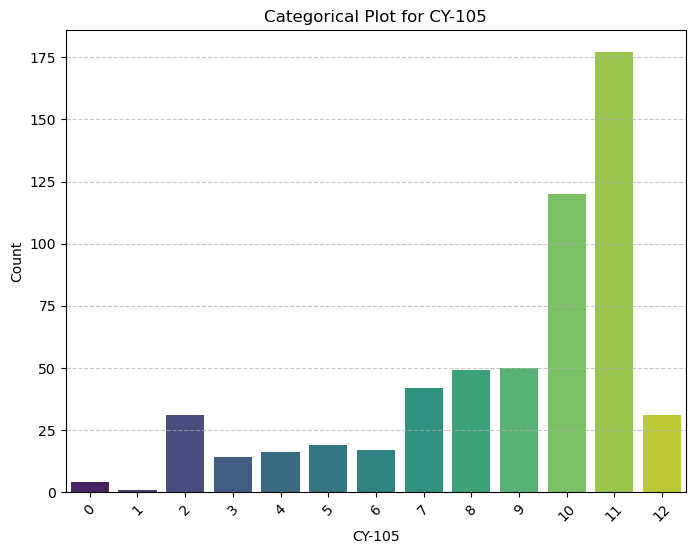

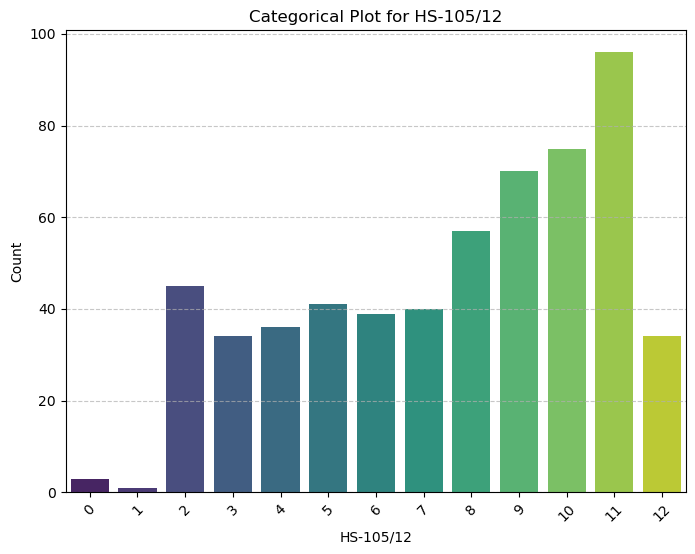

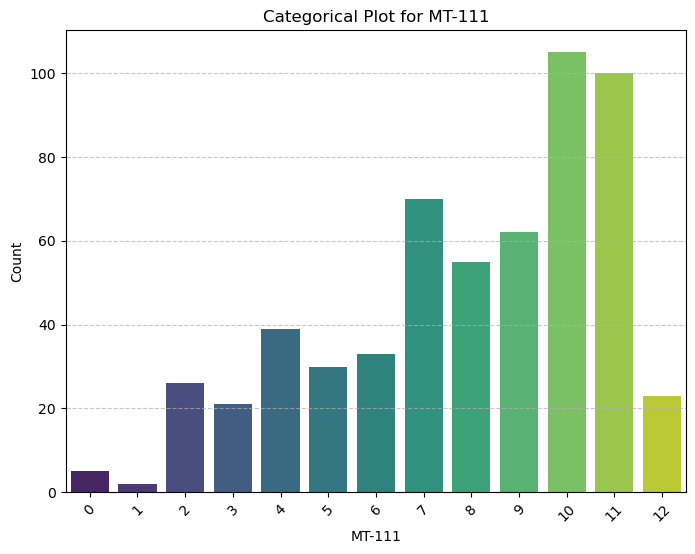

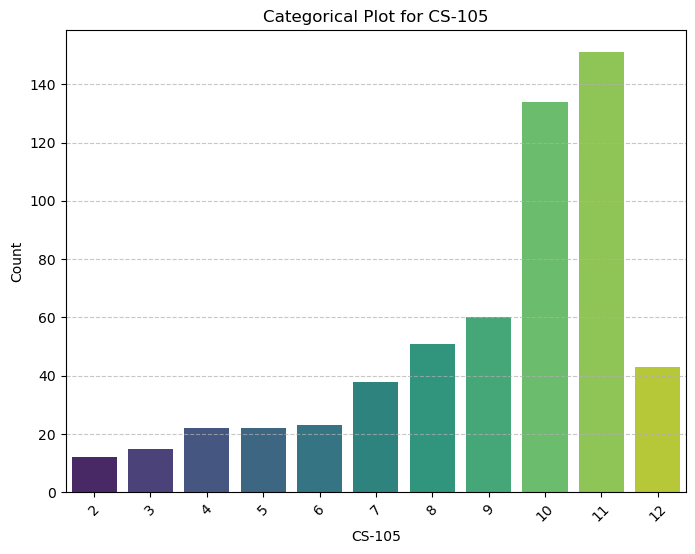

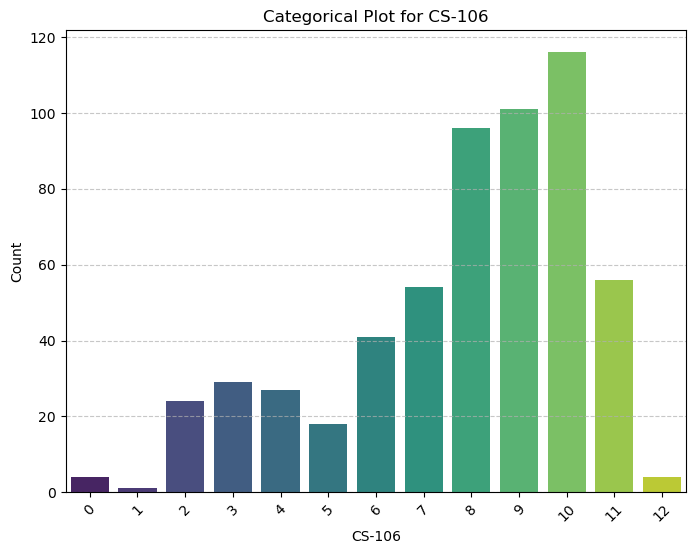

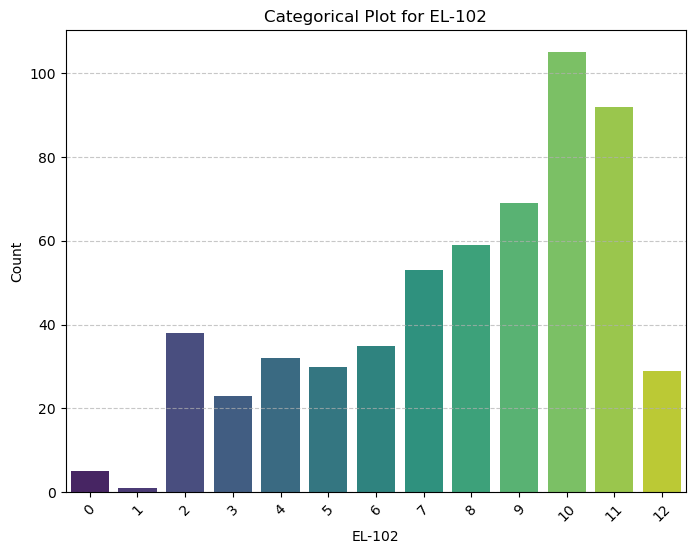

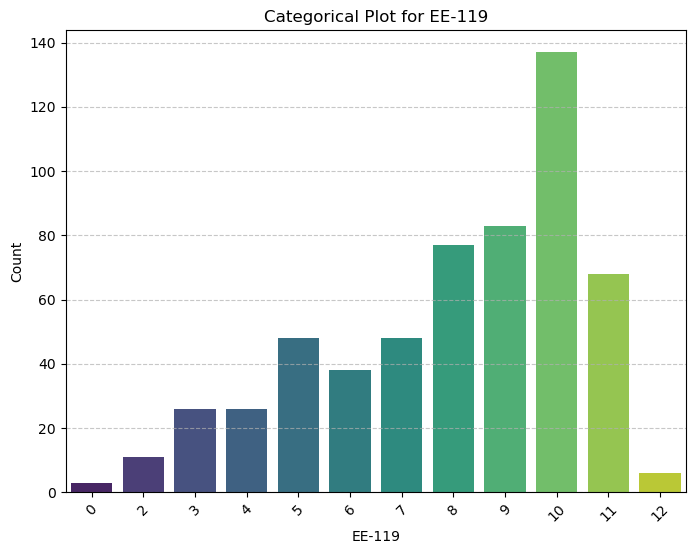

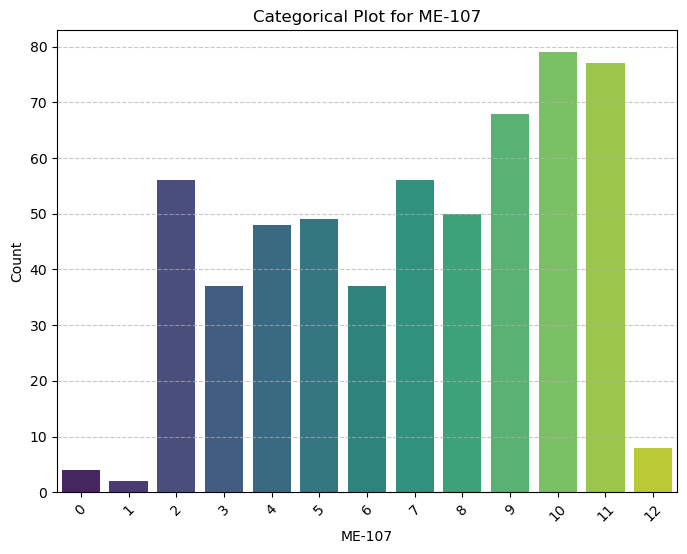

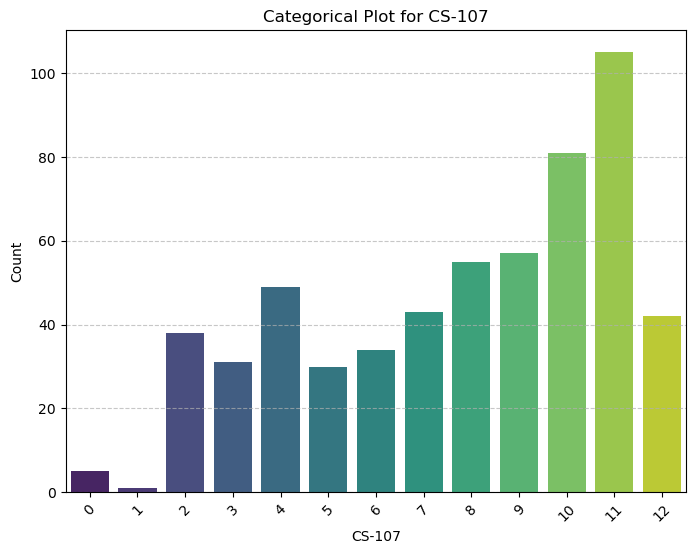

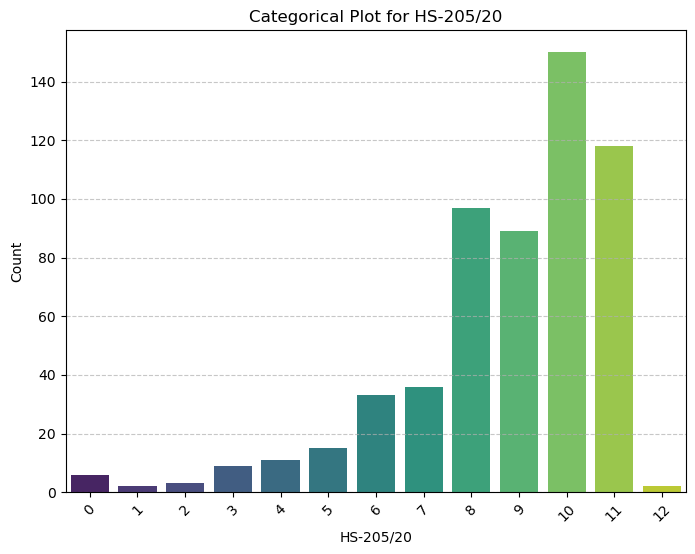

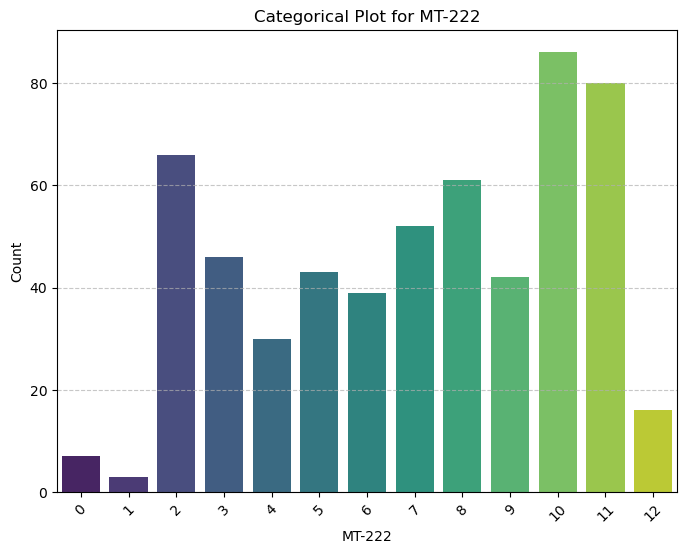

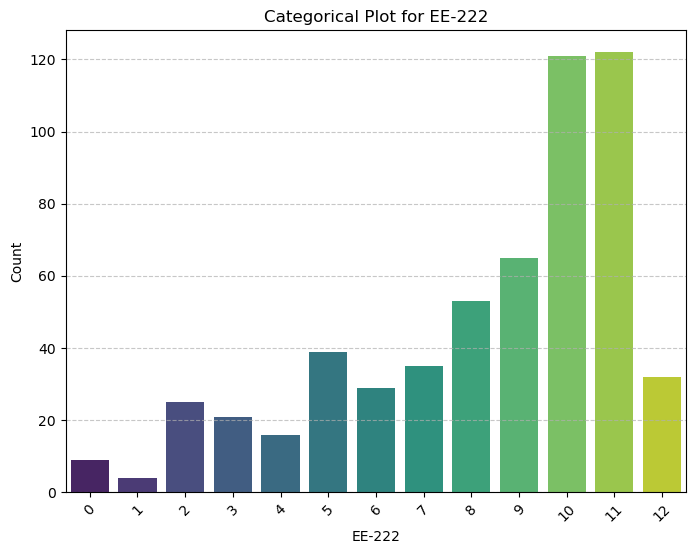

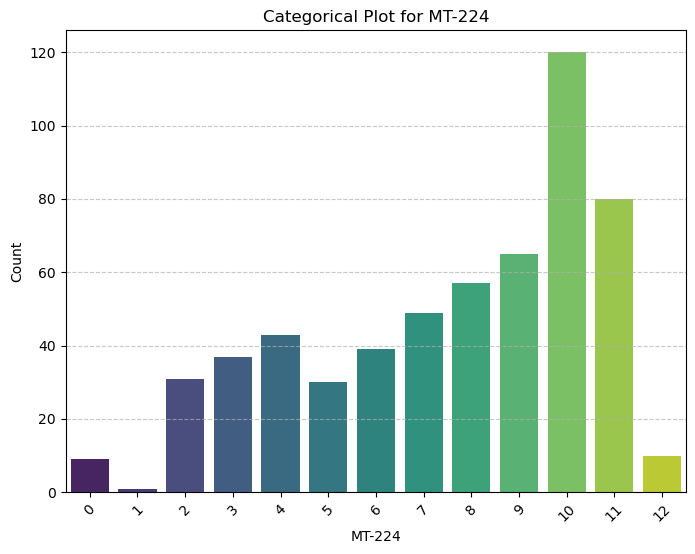

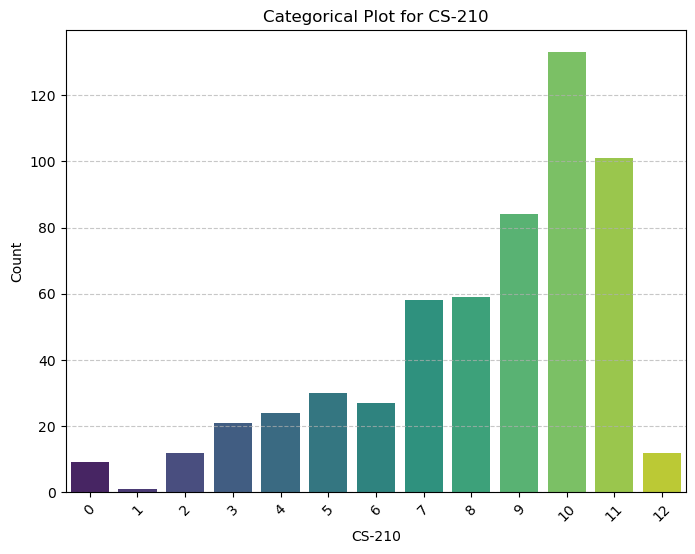

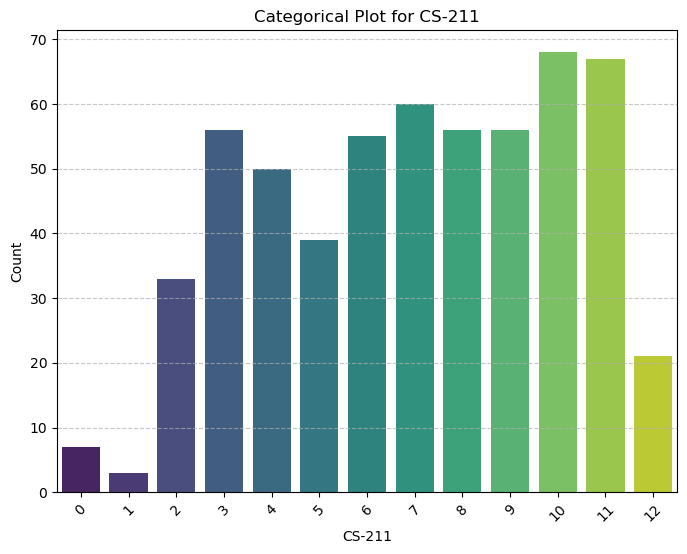

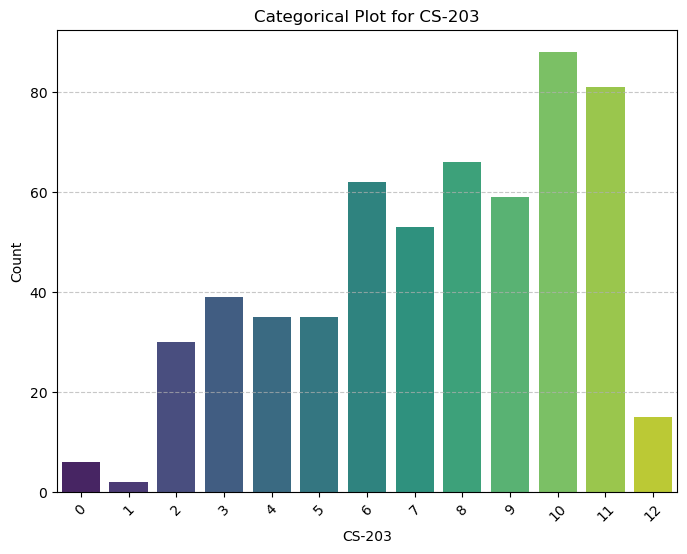

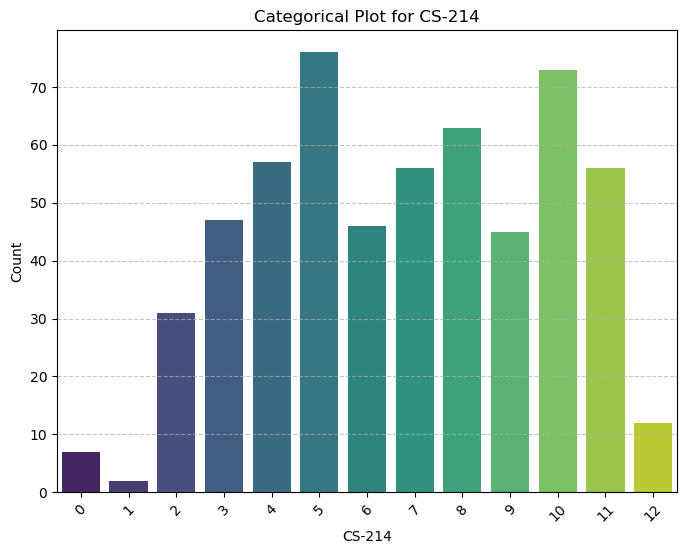

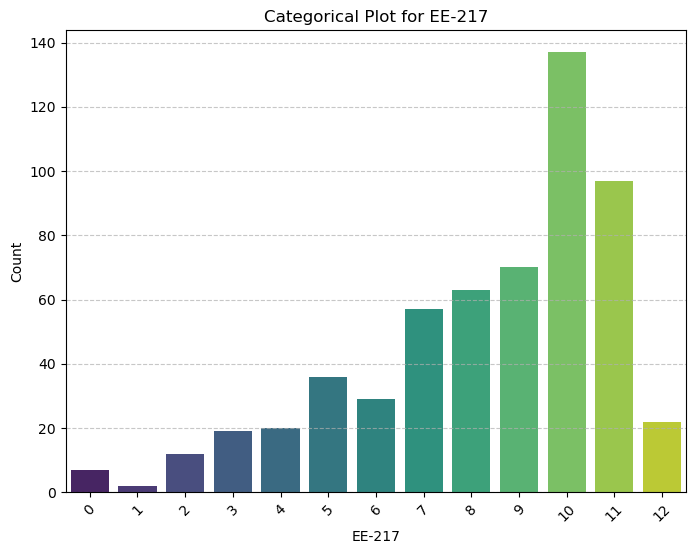

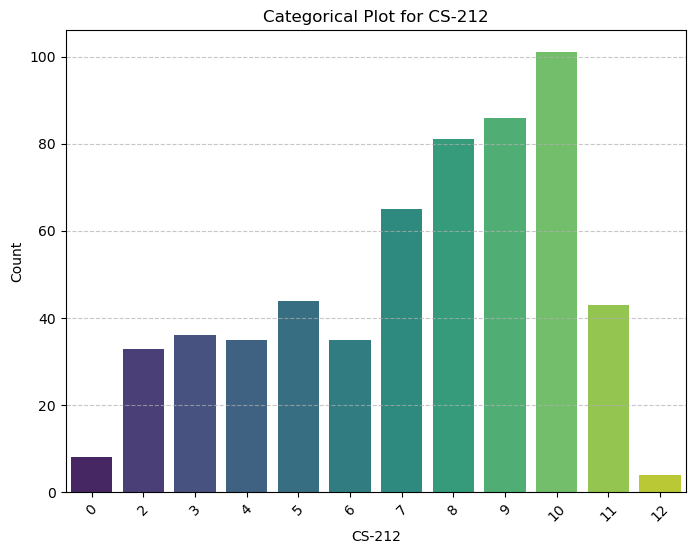

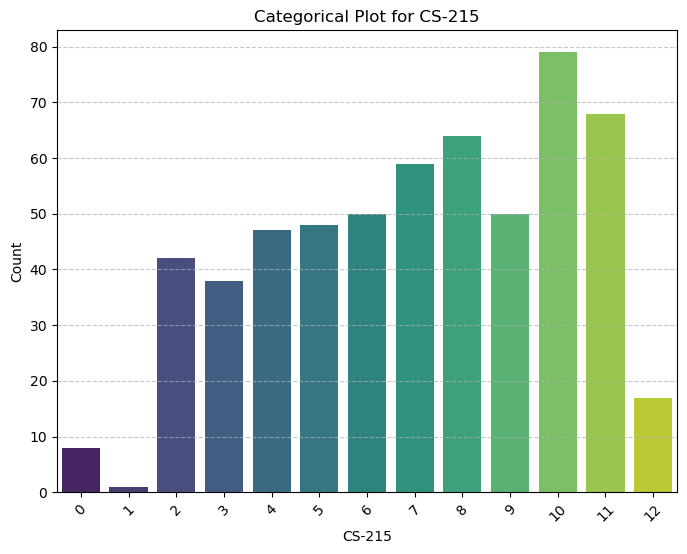

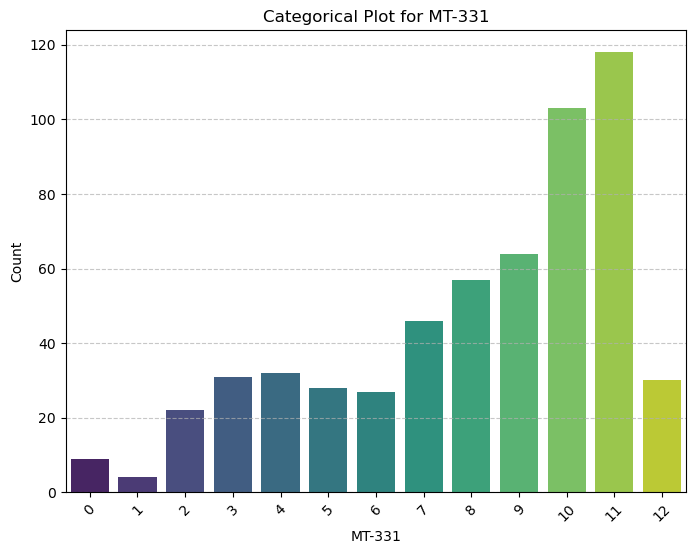

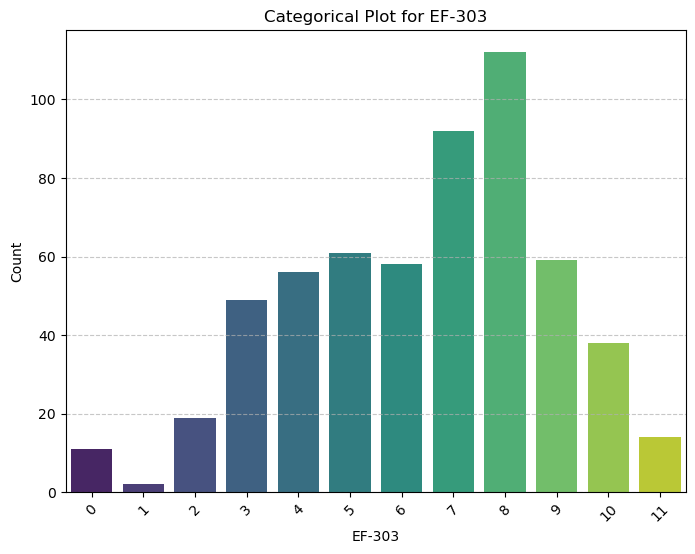

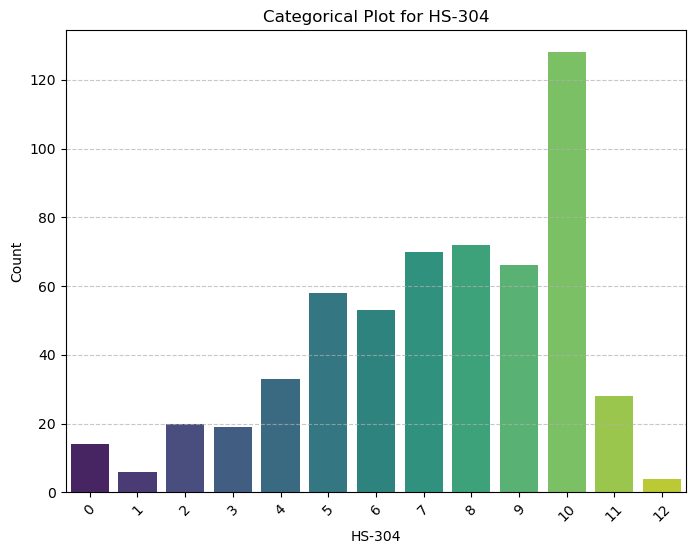

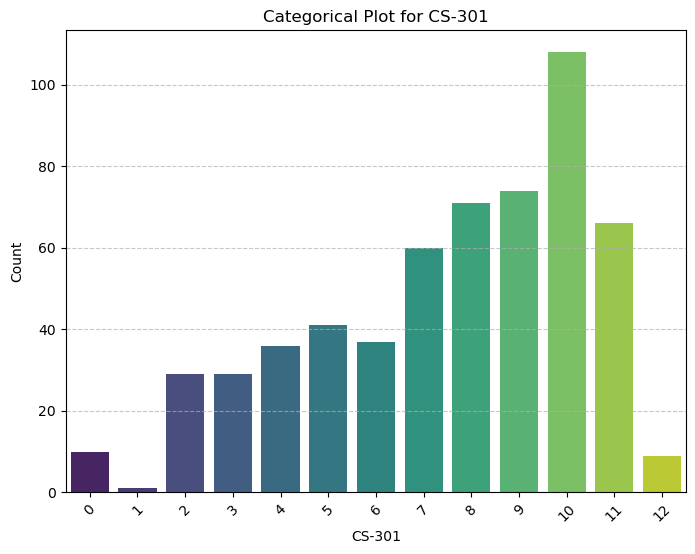

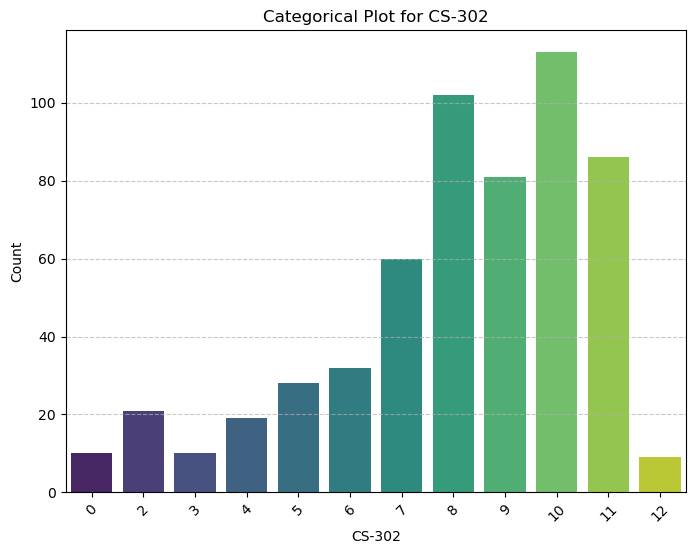

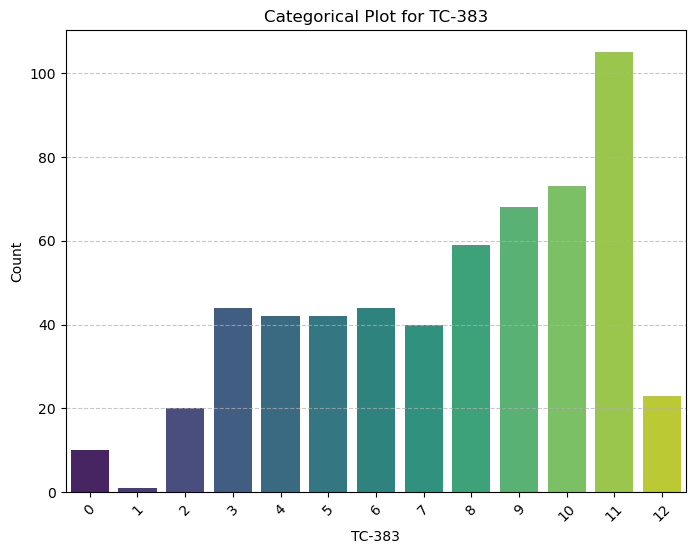

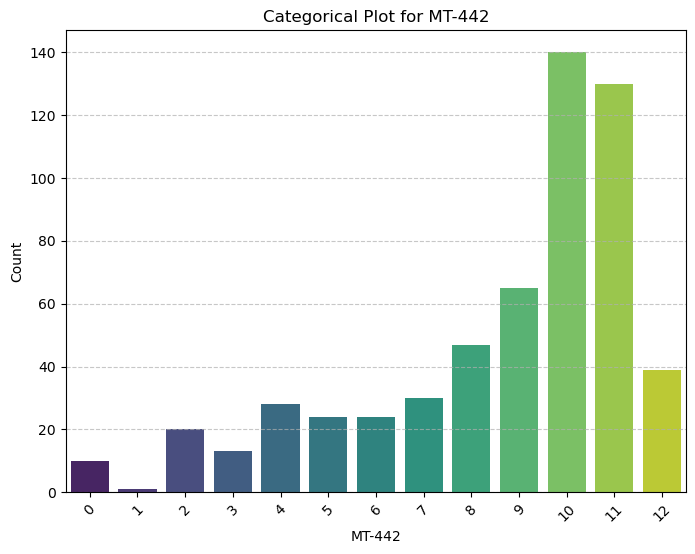

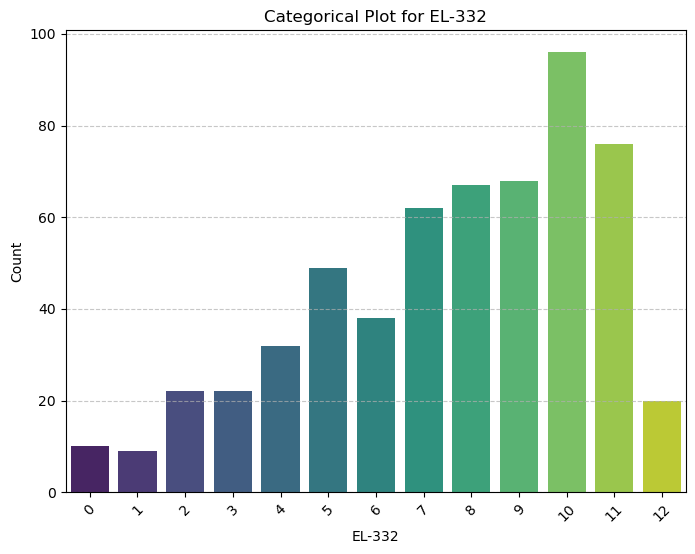

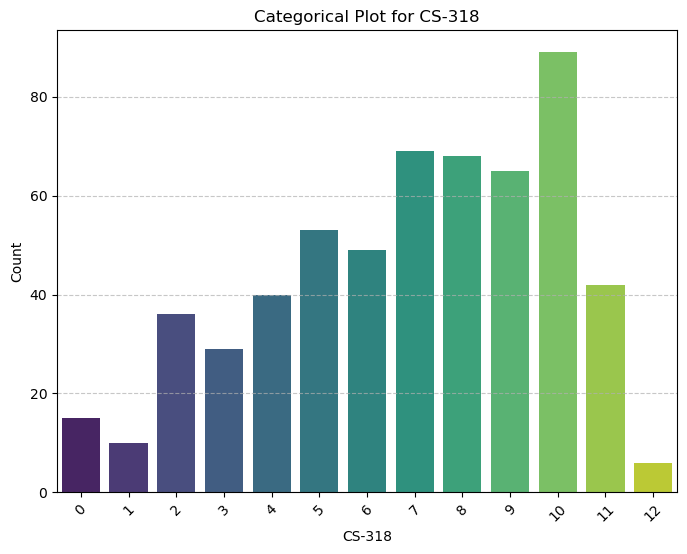

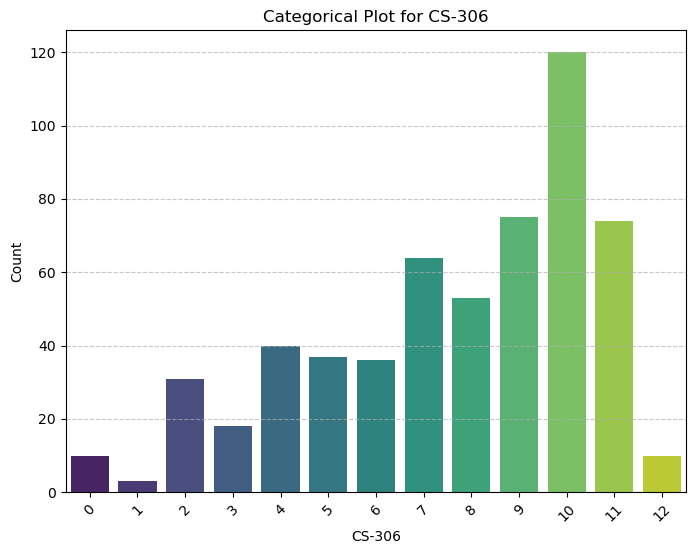

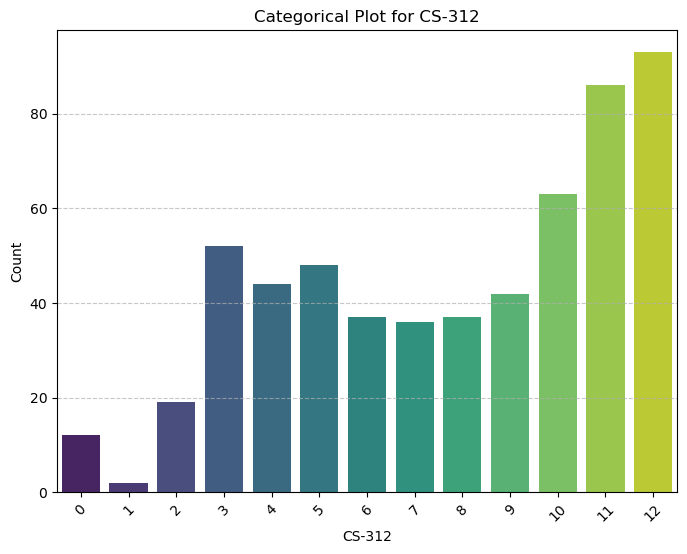

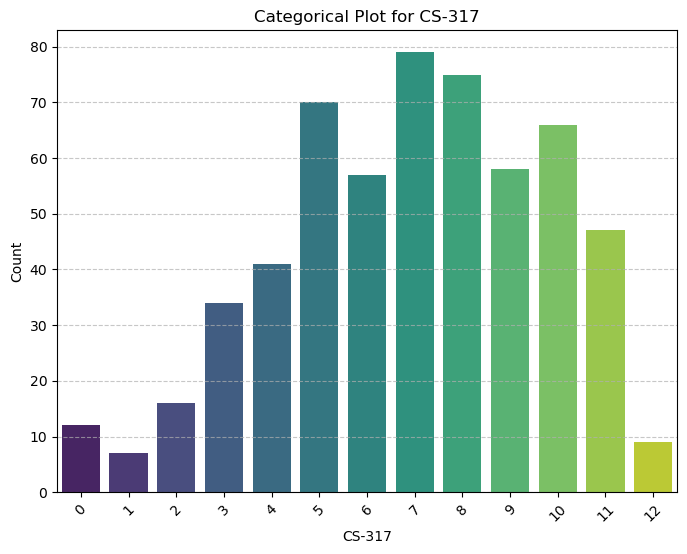

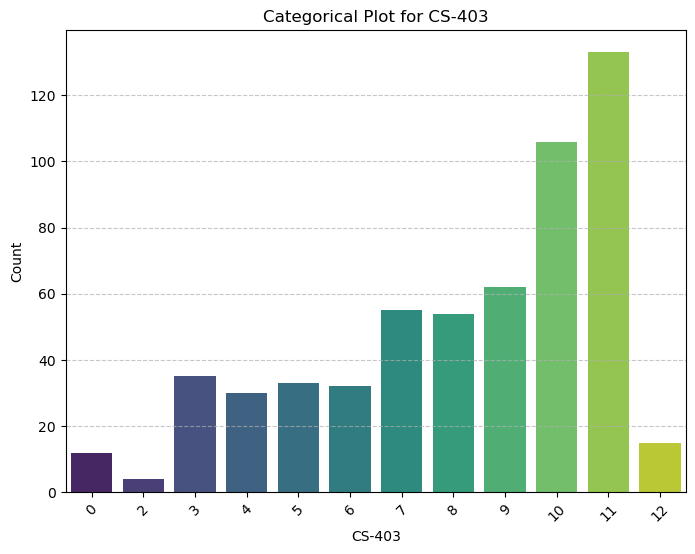

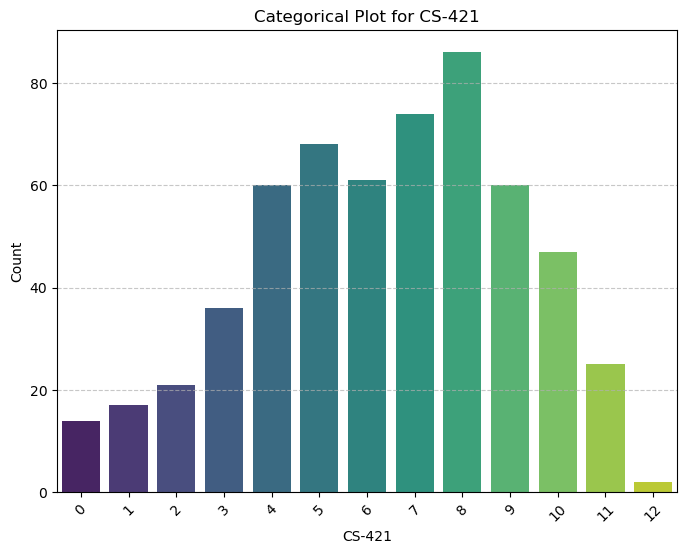

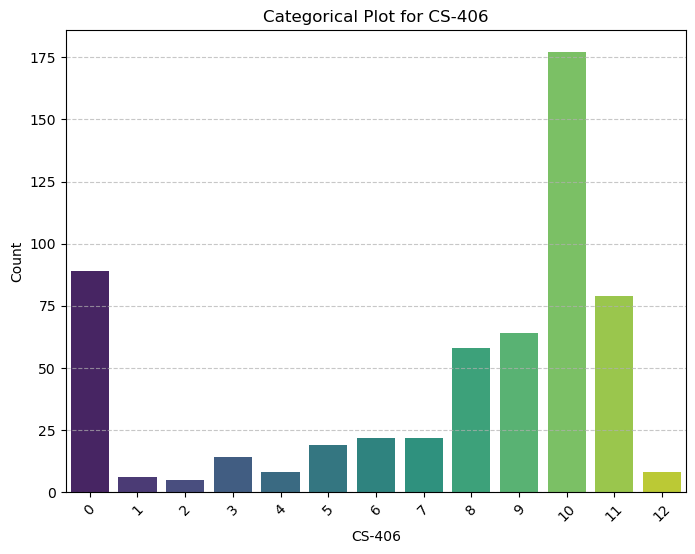

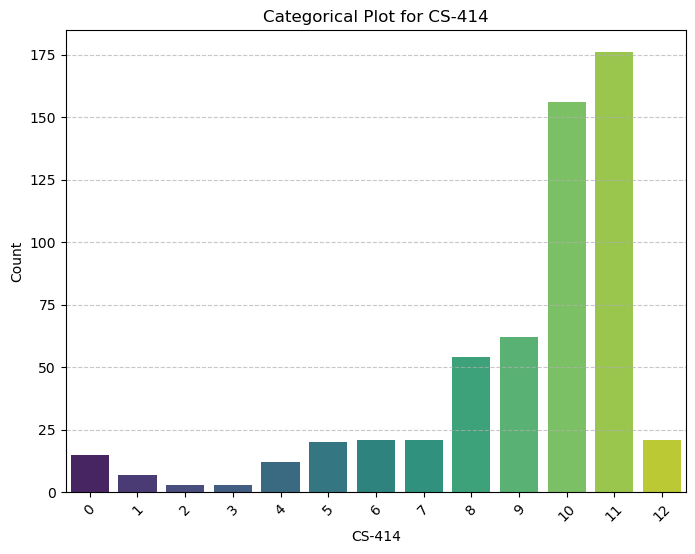

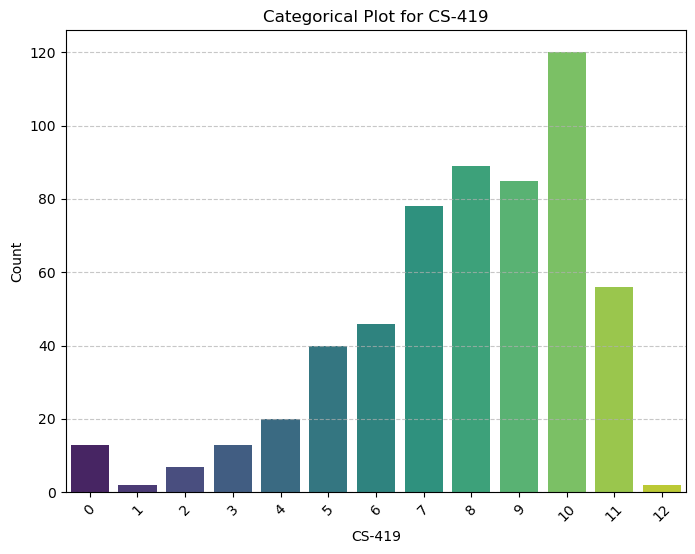

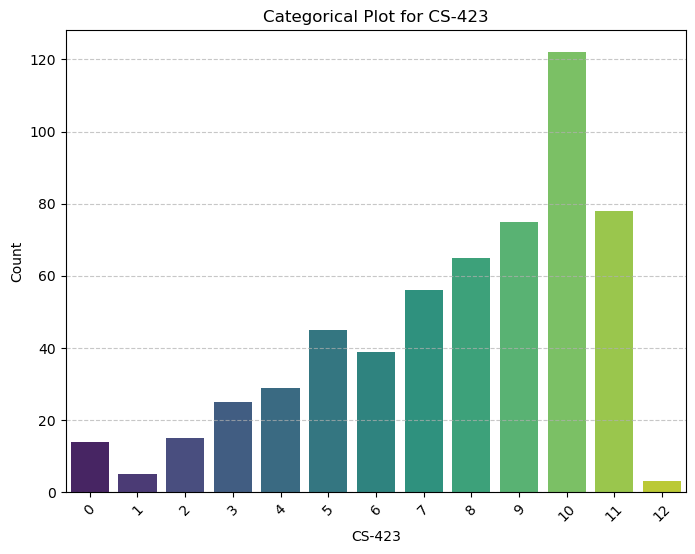

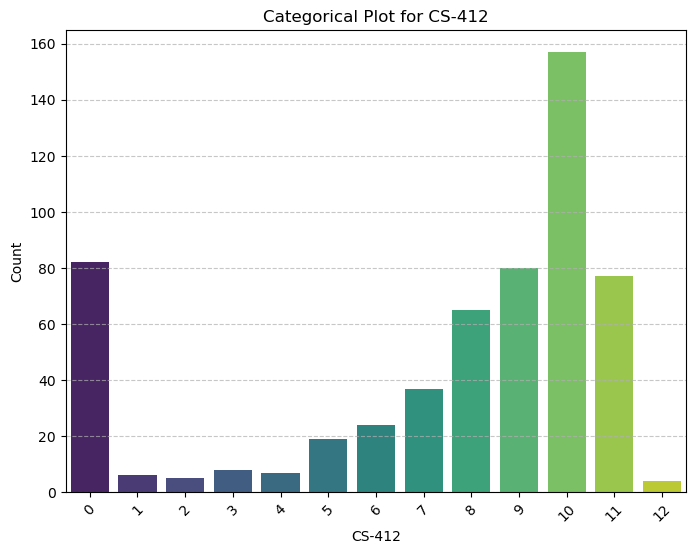

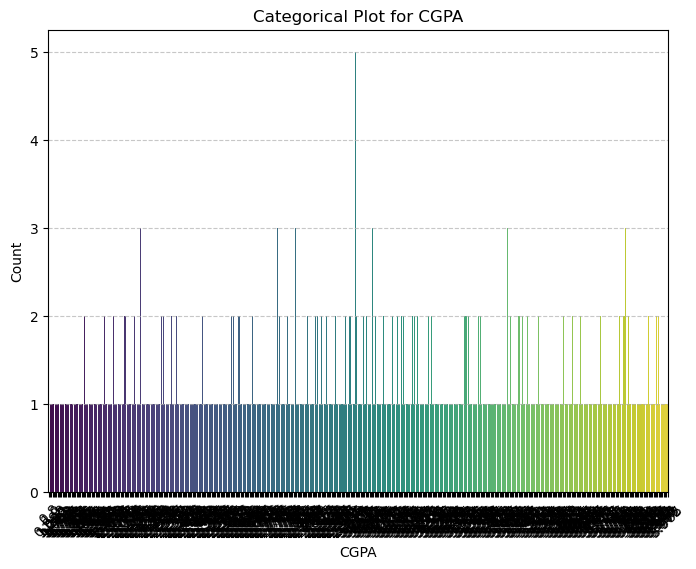

In [31]:
# Assuming columns_to_plot contains the column names you want to plot
for column_name in df_encoded.columns:
    plt.figure(figsize=(8, 6))  
    sns.countplot(data=df_encoded, x=column_name, palette='viridis')  

    plt.title(f'Categorical Plot for {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7) 
    plt.xticks(rotation=45)

    plt.show()

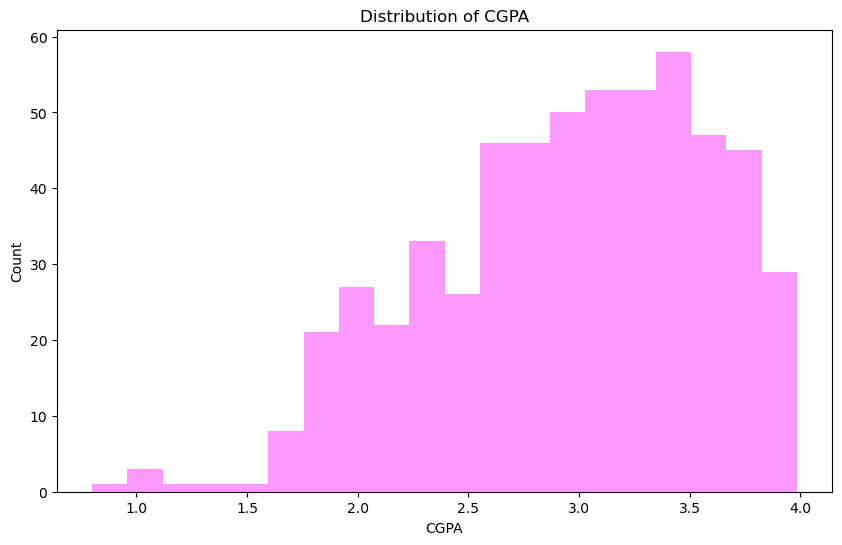

In [32]:
plt.figure(figsize=(10, 6))
sns.distplot(df_encoded['CGPA'], bins=20, kde=False, color='magenta')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

In [33]:
df_encoded.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

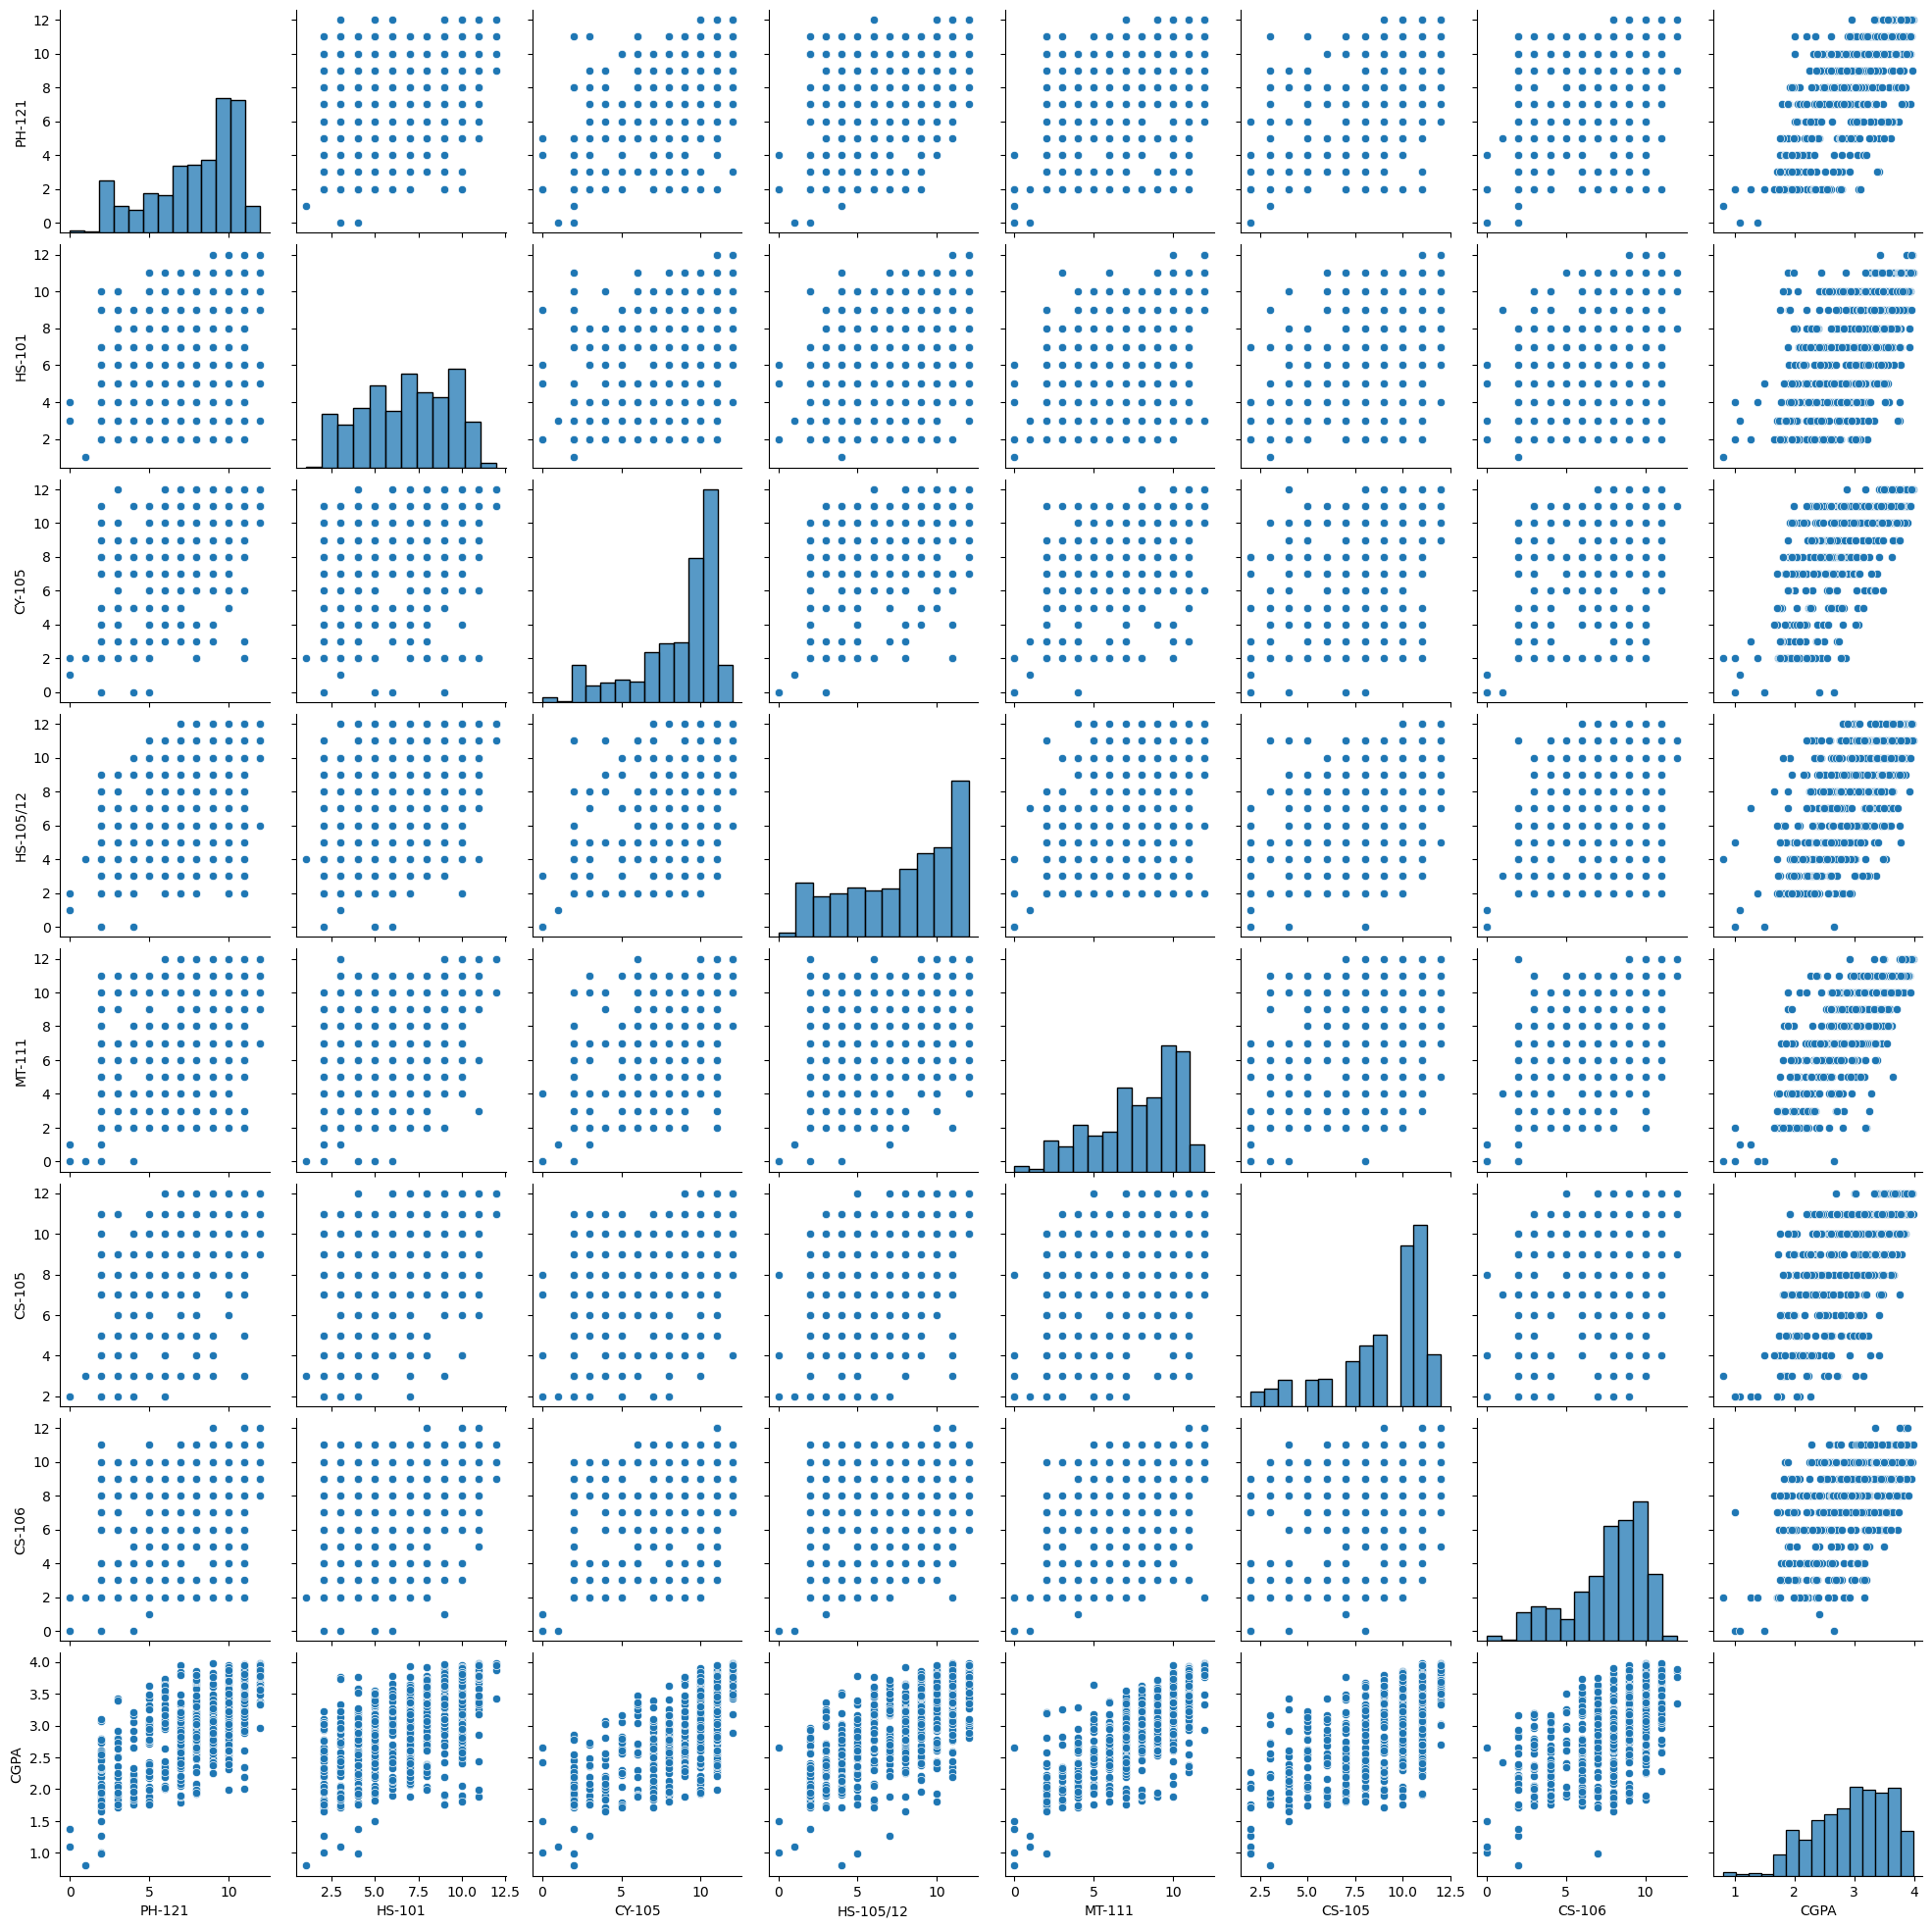

283 µs ± 6.36 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [34]:
# Assuming df_encoded is your DataFrame
sns.pairplot(df_encoded[['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'CGPA']])
plt.show()

# Measure execution time for summing the entire DataFrame
%timeit df_encoded.sum(axis=None)

In [35]:
df_encoded.corr()

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.408386  0.635511   0.559989  0.514876  0.672645   
HS-101     0.408386  1.000000  0.364558   0.492275  0.474669  0.444827   
CY-105     0.635511  0.364558  1.000000   0.588660  0.593188  0.626817   
HS-105/12  0.559989  0.492275  0.588660   1.000000  0.535057  0.550257   
MT-111     0.514876  0.474669  0.593188   0.535057  1.000000  0.455679   
CS-105     0.672645  0.444827  0.626817   0.550257  0.455679  1.000000   
CS-106     0.331192  0.371541  0.428262   0.542699  0.572151  0.330249   
EL-102     0.447970  0.388681  0.501964   0.385736  0.587290  0.386232   
EE-119     0.662131  0.330108  0.570539   0.478259  0.456433  0.603357   
ME-107     0.580436  0.369789  0.494818   0.388865  0.498980  0.500815   
CS-107     0.537887  0.526757  0.534725   0.580804  0.524042  0.561663   
HS-205/20  0.366900  0.223310  0.374408   0.256786  0.395198  0.248446   
MT-222     0.596181  0.433740  0.548845   0.523691  0.549495  0.535111   
EE-222     0.601247  0.424381  0.523348   0.447239  0.451958  0.561401   
MT-224     0.405344  0.284665  0.503424   0.454062  0.628563  0.323439   
CS-210     0.570565  0.370171  0.581669   0.539430  0.662922  0.503827   
CS-211     0.390546  0.371387  0.528001   0.427609  0.591463  0.412794   
CS-203     0.520071  0.297398  0.470275   0.368778  0.561867  0.472969   
CS-214     0.470942  0.495951  0.557403   0.473466  0.622622  0.497009   
EE-217     0.492099  0.388747  0.499105   0.432522  0.591544  0.423736   
CS-212     0.430604  0.384258  0.525386   0.547704  0.632707  0.402472   
CS-215     0.563833  0.451979  0.618347   0.544520  0.618944  0.529676   
MT-331     0.299225  0.207655  0.479587   0.359125  0.508363  0.337767   
EF-303     0.322412  0.287712  0.476751   0.499420  0.525428  0.320268   
HS-304     0.560091  0.479677  0.503698   0.445907  0.413319  0.586872   
CS-301     0.409366  0.349757  0.500047   0.532048  0.631638  0.356488   
CS-302     0.543285  0.401155  0.579592   0.536585  0.585462  0.542107   
TC-383     0.295400  0.388096  0.431387   0.514802  0.605326  0.323520   
MT-442     0.547547  0.297686  0.558202   0.428732  0.487908  0.524354   
EL-332     0.492775  0.440871  0.482589   0.454556  0.658839  0.452569   
CS-318     0.535055  0.494918  0.471453   0.464767  0.456209  0.547285   
CS-306     0.557009  0.485873  0.511339   0.577830  0.572044  0.513480   
CS-312     0.110444  0.268532  0.363460   0.358199  0.561870  0.143079   
CS-317     0.541632  0.416638  0.575047   0.560095  0.620111  0.462828   
CS-403     0.433611  0.284490  0.606454   0.556296  0.517696  0.393735   
CS-421     0.417510  0.371644  0.500978   0.514516  0.610740  0.376131   
CS-406     0.471613  0.130760  0.241058   0.212199  0.133276  0.426713   
CS-414     0.294239  0.291344  0.249538   0.240498  0.350739  0.277246   
CS-419     0.537266  0.314749  0.578042   0.542060  0.588761  0.440740   
CS-423     0.210480  0.286881  0.285882   0.332018  0.487250  0.183885   
CS-412     0.569111  0.300680  0.379592   0.289704  0.237894  0.483445   
CGPA       0.680941  0.560989  0.696149   0.669029  0.775621  0.644594   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.331192  0.447970  0.662131  0.580436  ...  0.110444  0.541632   
HS-101     0.371541  0.388681  0.330108  0.369789  ...  0.268532  0.416638   
CY-105     0.428262  0.501964  0.570539  0.494818  ...  0.363460  0.575047   
HS-105/12  0.542699  0.385736  0.478259  0.388865  ...  0.358199  0.560095   
MT-111     0.572151  0.587290  0.456433  0.498980  ...  0.561870  0.620111   
CS-105     0.330249  0.386232  0.603357  0.500815  ...  0.143079  0.462828   
CS-106     1.000000  0.384775  0.317626  0.348004  ...  0.560780  0.484346   
EL-102     0.384775  1.000000  0.447828  0.487005  ...  0.432274  0.531170   
EE-119     0.317626  0.447828  1.000000  0.611633  ...  0.227949  0.511708   
ME-107     0.348004  0.487005  0.611633  1.000000 

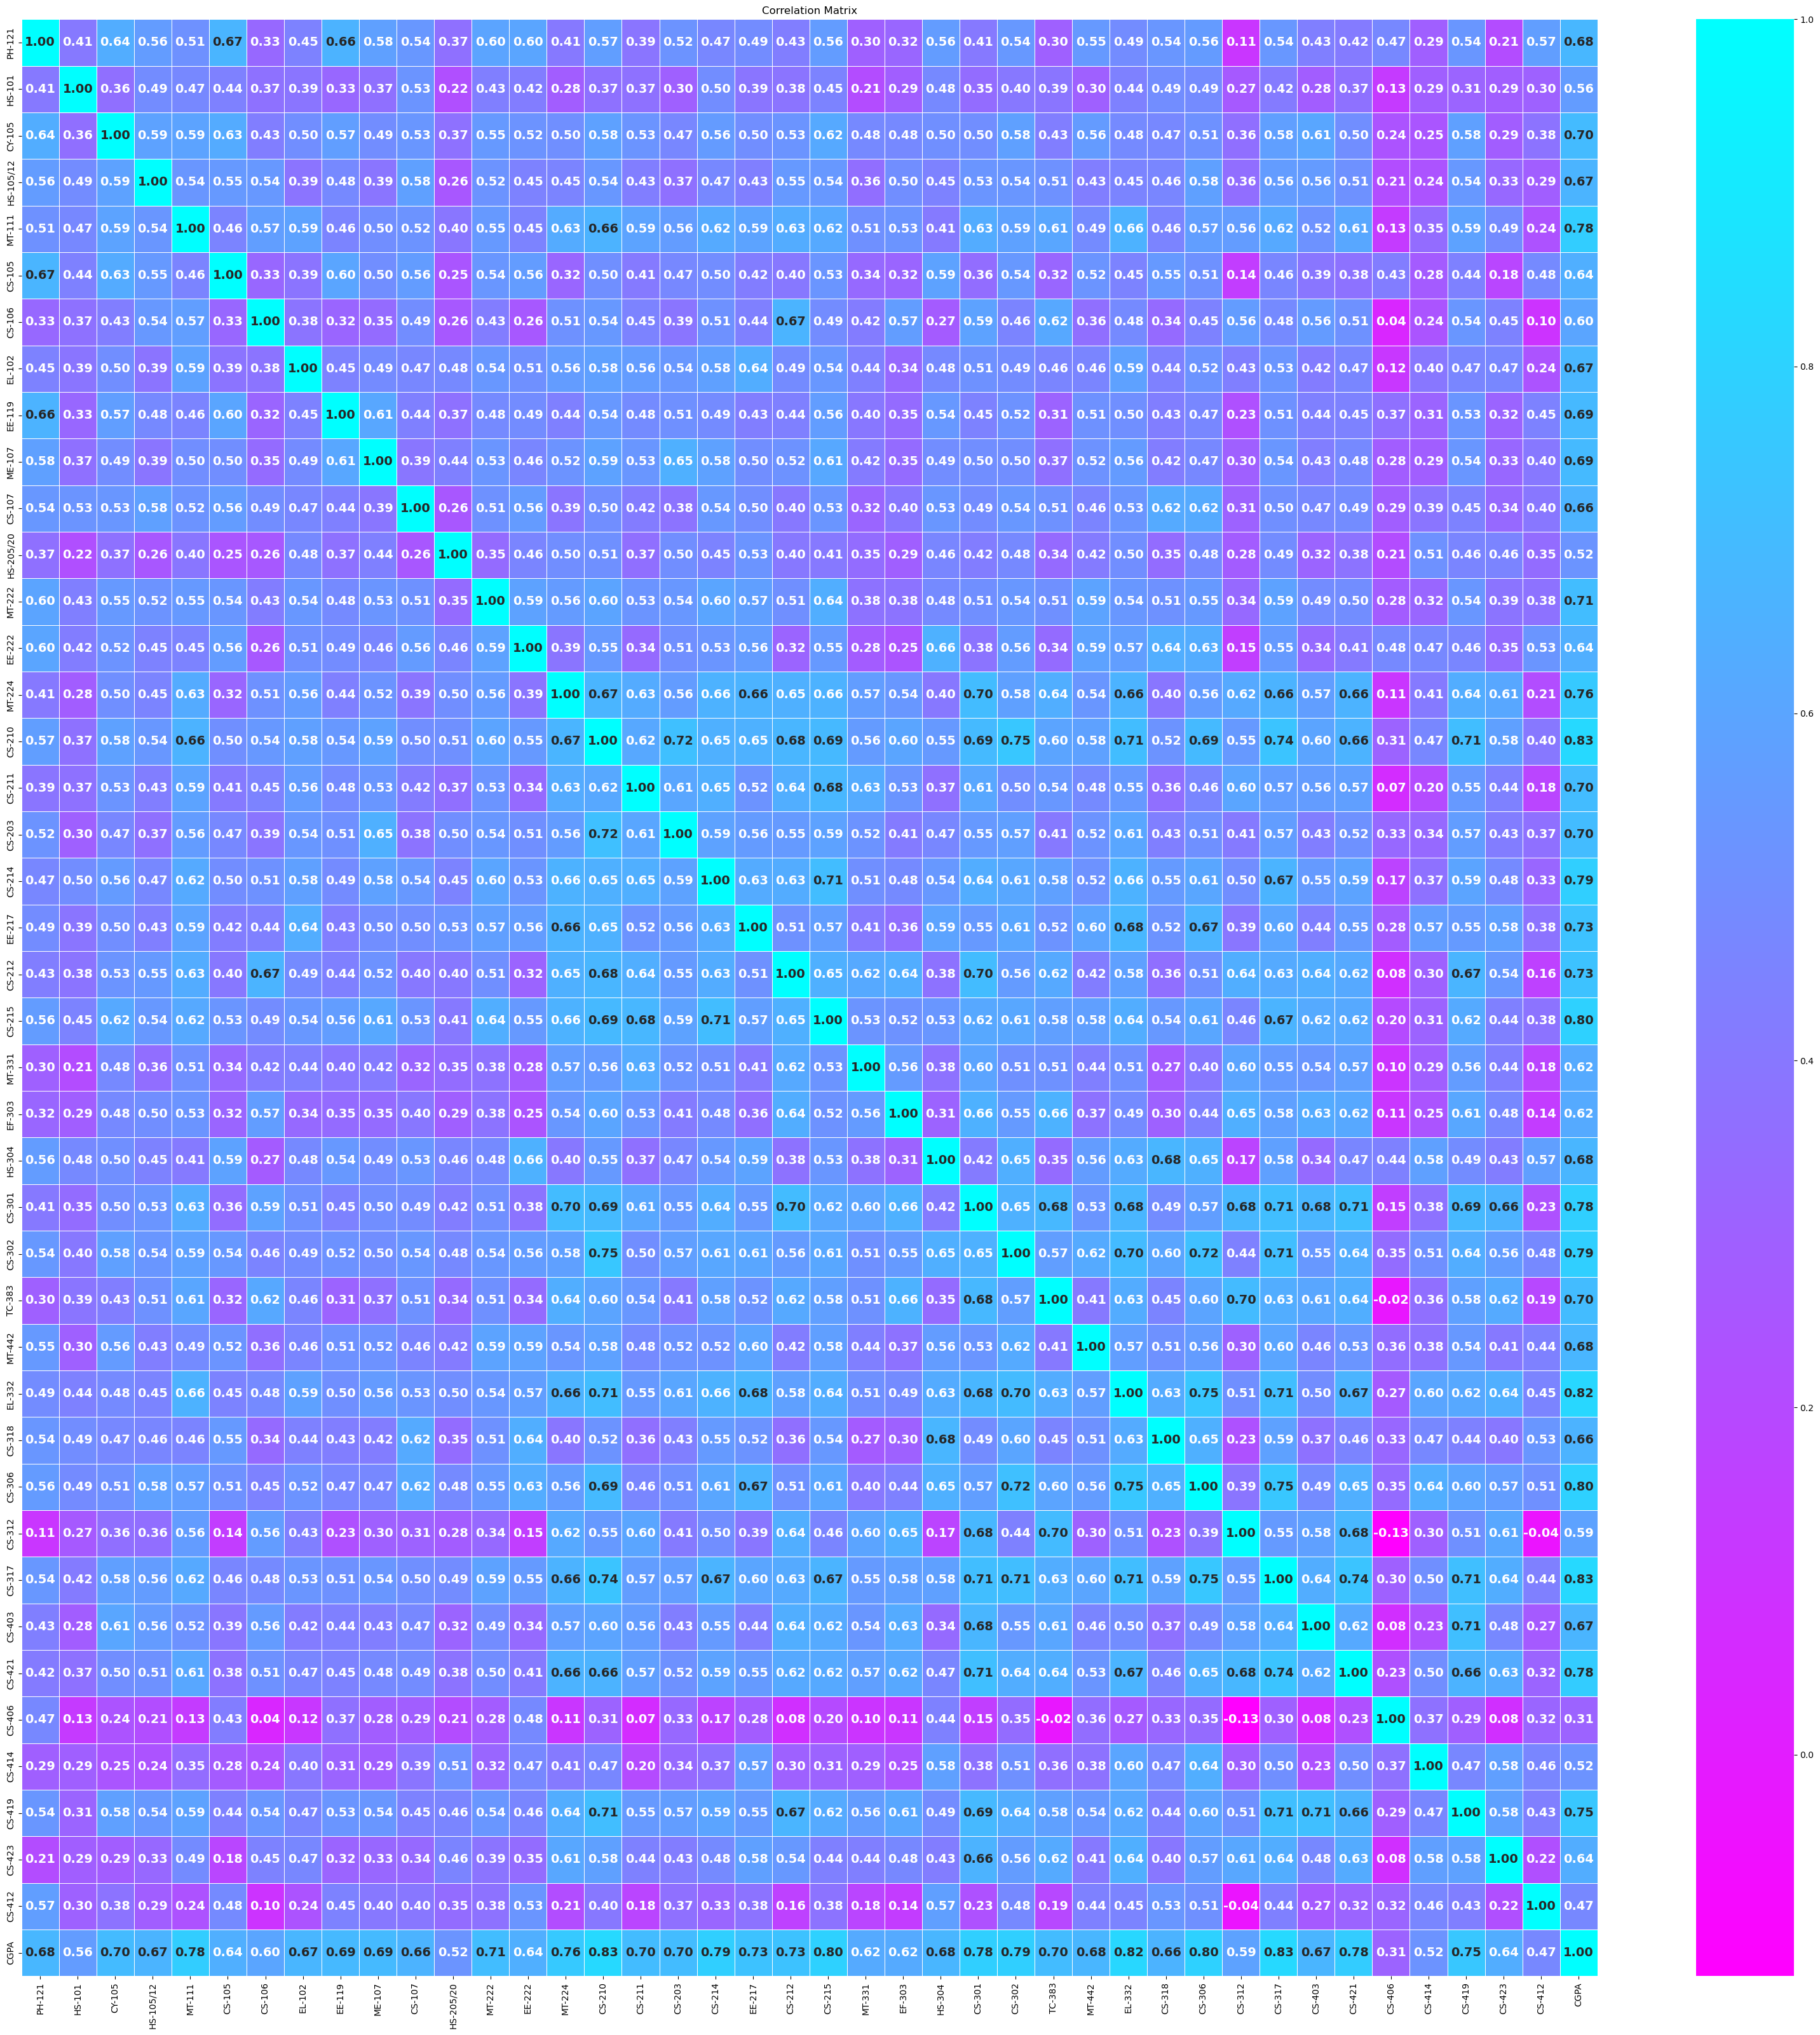

In [36]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(40, 40))

sns.heatmap(correlation_matrix, cmap='cool_r', annot=True, fmt=".2f", linewidths=.5,
            annot_kws={"weight": "bold", "size": 14})  

plt.title('Correlation Matrix')
plt.show()

In [37]:
correlation_cgpa = df_encoded.corr('pearson')['CGPA'].sort_values(ascending=False)

# Convert to DataFrame and reset the index
correlation_df = correlation_cgpa.to_frame().reset_index().style.background_gradient(cmap='mako_r')
correlation_df

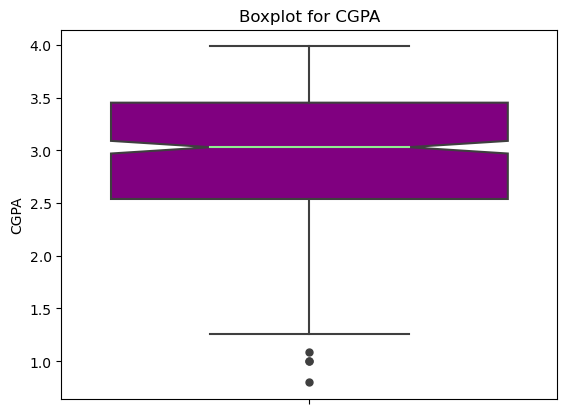

In [38]:
sns.boxplot(y=df['CGPA'], notch=True, flierprops={"marker": "o"}, boxprops={"facecolor": 'purple'}, medianprops={"color": "lightgreen"})
plt.title('Boxplot for CGPA')
plt.ylabel('CGPA')
plt.show()

###### Dividing inputs and labels.

In [39]:
 X = df_encoded.drop('CGPA', axis=1) 
y = df_encoded['CGPA'] 

 X.shape, y.shape

((571, 41), (571,))

###### Scaling Features

In [40]:
from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0   -0.349100 -1.399462 -1.694775  -0.843074 -1.370706 -2.399165 -2.246459   
1    1.009237 -1.766861 -2.048343  -1.805223 -0.327605 -1.598742 -2.246459   
2    1.009237  0.437533  0.780203  -0.201641  0.367795  0.802525 -0.312892   
3   -2.047020 -0.297265 -2.048343  -1.805223 -2.066106  0.402314 -1.859746   
4    0.669653  1.172331  0.426635   0.439791  1.063195  0.802525  0.847248   
..        ...       ...       ...        ...       ...       ...       ...   
566 -0.009515  1.539730  0.780203   0.760508  1.410895  0.802525  0.847248   
567  1.348821  1.539730  0.780203   1.081224  1.063195  0.802525  1.233961   
568 -0.009515  1.539730  0.426635   0.439791  1.063195  0.802525  1.233961   
569  1.009237  0.804932 -2.401911   1.081224 -2.066106 -2.399165 -0.312892   
570 -1.028268 -1.766861 -2.401911  -0.843074 -1.023006 -2.399165  0.073821   

       EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317  \
0   -1.308184 -0.392024 -0.990212  ... -0.905912 -1.108217 -1.059683   
1    1.042900 -1.979580 -1.641232  ... -1.936342 -1.400096 -1.783029   
2    0.371162  0.798644  0.962848  ...  0.811471  0.059296  0.387009   
3   -1.308184 -2.376469 -0.339192  ... -1.249389 -1.400096 -0.698010   
4    0.371162  1.195533  0.962848  ...  0.811471 -0.232583  0.748682   
..        ...       ...       ...  ...       ...       ...       ...   
566  0.707031  1.592422  0.637338  ...  0.467994  0.643052  1.110355   
567  0.707031  1.195533  1.288358  ...  0.811471  0.351174  0.748682   
568  1.042900  1.195533  0.311828  ...  0.467994  0.643052  0.387009   
569 -1.308184 -0.392024 -0.990212  ...  0.467994 -1.691974  0.387009   
570 -0.636445 -1.185802 -1.315722  ... -1.592866 -0.524461 -0.698010   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0   -1.462668 -0.864531  0.670133  0.736098 -1.541560  0.111790  0.688579  
1   -1.112339 -1.599126  0.670133 -0.792309 -1.139628 -0.940384  0.142118  
2    0.989632 -0.497234  0.931503  0.736098  1.271963  0.813238  0.961810  
3   -1.812996 -0.864531 -0.113978 -0.410207 -0.737696 -0.589659 -0.404343  
4    0.288975  0.237360  0.670133  0.736098  0.870031  0.813238  0.961810  
..        ...       ...       ...       ...       ...       ...       ...  
566  0.989632  1.706549  0.931503 -0.028106  0.468099  0.111790  0.961810  
567  0.989632  1.706549  0.670133 -0.410207  0.870031 -0.940384  0.688579  
568  0.989632  0.971954  0.931503 -1.556513  0.468099  0.813238  0.688579  
569 -0.061354 -0.864531 -1.420828 -1.556513  0.066167 -0.238935 -0.677574  
570 -0.411682 -1.599126 -1.682199 -1.938615  0.468099 -1.992557 -0.950804  

[571 rows x 41 columns]

In [41]:
X.isin([' ','NA','_', 'NaN','0']).any()

PH-121       False
HS-101       False
CY-105       False
HS-105/12    False
MT-111       False
CS-105       False
CS-106       False
EL-102       False
EE-119       False
ME-107       False
CS-107       False
HS-205/20    False
MT-222       False
EE-222       False
MT-224       False
CS-210       False
CS-211       False
CS-203       False
CS-214       False
EE-217       False
CS-212       False
CS-215       False
MT-331       False
EF-303       False
HS-304       False
CS-301       False
CS-302       False
TC-383       False
MT-442       False
EL-332       False
CS-318       False
CS-306       False
CS-312       False
CS-317       False
CS-403       False
CS-421       False
CS-406       False
CS-414       False
CS-419       False
CS-423       False
CS-412       False
dtype: bool

###### Checking Best Random State

In [42]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.9762871267528404 on Random_state 176


###### Splitting into Training and Testing Sets

In [43]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size =0.2, random_state= maxRS)

###### Training and Evaluating the Model

**LinearRegression**

In [44]:
LR = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(LR, x_train, y_train, cv=5, scoring='r2')

# Fit the model on the entire training set
LR.fit(x_train, y_train)

# Predict on the test set
y_pred = LR.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

R2 Score: 0.9798955428447456
MAE: 0.07047640709508536
Cross-Validation Scores: [0.9679442  0.92348026 0.97049585 0.94663304 0.87666184]
Mean Cross-Validation Score: 0.9370430381754286


**Ridge Regression**

In [45]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Example parameter values, you can modify it

# Create the Ridge regression model
R = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(R, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_R = grid_search.best_estimator_
best_R.fit(x_train, y_train)

# Predict on the test set
y_pred = best_R.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_R, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'alpha': 100}
R2 Score: 0.9837214843411907
MAE: 0.06152718609761237
Cross-Validation Scores: [0.9727457  0.91679996 0.97613261 0.96084763 0.8668242 ]
Mean Cross-Validation Score: 0.9386700172344102


**Lasso Regression**

In [46]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Example parameter values, you can modify it

# Create the Lasso regression model
L = Lasso()

# Perform grid search with cross-validation
grid_search = GridSearchCV(L, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_L = grid_search.best_estimator_
best_L.fit(x_train, y_train)

# Predict on the test set
y_pred = best_L.predict(x_test)


# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_L, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'alpha': 0.1}
R2 Score: 0.9125377883956475
MAE: 0.15018337058945055
Cross-Validation Scores: [0.89722233 0.89648301 0.90124307 0.87565685 0.84861975]
Mean Cross-Validation Score: 0.8838450004426562


**Decision Tree Regressor**

In [47]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the Decision Tree Regressor model
DTR = DecisionTreeRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(DTR, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_DTR = grid_search.best_estimator_
best_DTR.fit(x_train, y_train)

# Predict on the test set
y_pred = best_DTR.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_DTR, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
R2 Score: 0.8394021611603106
MAE: 0.19986086956521742
Cross-Validation Scores: [0.7950123  0.74765335 0.8638862  0.83025514 0.69131865]
Mean Cross-Validation Score: 0.7856251290165963


**Random Forest Regressor**

In [48]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the Random Forest Regressor model
RFR = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(RFR, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_RFR = grid_search.best_estimator_
best_RFR.fit(x_train, y_train)

# Predict on the test set
y_pred = best_RFR.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_RFR, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R2 Score: 0.9676564643909138
MAE: 0.08211900000000008
Cross-Validation Scores: [0.96412024 0.94628111 0.94627192 0.96529045 0.93143429]
Mean Cross-Validation Score: 0.9506796033341252


**Extra Tree Regressor**

In [49]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the Extra Trees Regressor model
ETR = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(ETR, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_ETR = grid_search.best_estimator_
best_ETR.fit(x_train, y_train)

# Predict on the test set
y_pred = best_ETR.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_ETR, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R2 Score: 0.9755965335858766
MAE: 0.0728607246376811
Cross-Validation Scores: [0.96892333 0.96664818 0.96571379 0.97134127 0.95459978]
Mean Cross-Validation Score: 0.9654452709553727


**Ada Boost Regressor**

In [50]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the Gradient Boosting Regressor model
GBR = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(GBR, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_GBR = grid_search.best_estimator_
best_GBR.fit(x_train, y_train)

# Predict on the test set
y_pred = best_GBR.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_GBR, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
R2 Score: 0.980089185609009
MAE: 0.06492781901686061
Cross-Validation Scores: [0.9699396  0.97636102 0.97278152 0.97096794 0.962557  ]
Mean Cross-Validation Score: 0.970521416765569


**XGB Regressor**

In [51]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the XGBoost Regressor model
XGBR = XGBRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(XGBR, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_XGBR = grid_search.best_estimator_
best_XGBR.fit(x_train, y_train)

# Predict on the test set
y_pred = best_XGBR.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_XGBR, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.8}
R2 Score: 0.9712856127387663
MAE: 0.07623732660542365
Cross-Validation Scores: [0.97517308 0.97079699 0.97911391 0.97184029 0.95732825]
Mean Cross-Validation Score: 0.9708505046040848


###### Storing the Trained Model

In [52]:
import pickle
filename = 'LnearReg.pkl'
pickle.dump(LR, open(filename, 'wb'))
pickle.dump(scaler, open('scaler.pkl','wb'))

In [53]:
with open('LnearReg.pkl', 'rb') as file:
    data = pickle.load(file)

In [54]:
data.predict(X_test)

array([2.7554268 , 3.58964707, 2.82704601, 3.31876065, 3.1815774 ,
       3.77667909, 3.78280765, 3.37996556, 2.98009287, 2.18135659,
       3.44021569, 3.80204654, 3.55221313, 1.96800883, 2.62779756,
       3.46466491, 3.13181977, 3.41752596, 1.14583547, 2.57356569,
       3.48141896, 2.89900932, 4.00019729, 3.6463899 , 3.69162339,
       2.82530984, 2.69349488, 2.62714436, 2.71184488, 3.62204278,
       3.10691573, 3.03674439, 2.34983401, 3.77836173, 3.26083887,
       3.69933363, 2.41386477, 3.64744678, 2.14463075, 2.19000168,
       2.86129213, 1.37470425, 3.06662049, 3.16648316, 3.83645494,
       2.86674938, 4.00208161, 3.07653726, 3.80353116, 3.56773256,
       2.75166314, 3.38226416, 3.68318981, 2.44716485, 3.72018014,
       3.03333555, 2.61035055, 3.21196981, 3.07487476, 3.27151669,
       2.92333162, 2.91623969, 2.64493146, 1.66304711, 3.8145195 ,
       2.36534399, 3.21936589, 2.65202794, 3.35861299, 2.25642587,
       2.25755163, 2.97193475, 3.41177079, 3.35415646, 3.17377